# Project 1 Machine Learning Terapan - Predictive Analysis: Forecasting and Comparing Maize, Rice, Green Coffee, Cocoa Beans and Palm Oil Production in ASEAN Using LSTM

- **Nama:** Fadhilah Nurrahmayanti
- **Email:** a117xbm150@devacademy.id
- **ID Dicoding:** dilaafn


## Project Domain

Produksi pangan merupakan sektor vital bagi negara-negara ASEAN, mengingat sebagian besar wilayahnya masih mengandalkan pertanian sebagai sumber utama pangan dan pendapatan. Dengan meningkatnya populasi dan perubahan iklim yang tidak menentu, memprediksi produksi pangan menjadi kebutuhan strategis. Data historis produksi komoditas seperti jagung, beras, kopi, coklat, dan minyak sawit dapat dimanfaatkan untuk membuat prediksi produksi di masa depan.

Meskipun sangat penting, tren produksi di negara-negara ini sering kali sangat fluktuatif, dipengaruhi oleh variabilitas musiman dan dinamika global. Hal ini menyulitkan dalam memproyeksikan tingkat pasokan di masa depan secara akurat, yang pada akhirnya menjadi tantangan dalam ketahanan pangan, strategi perdagangan, dan perencanaan kebijakan jangka panjang.

Dengan tersedianya data melalui [World Food Production Dataset (Kaggle)](https://www.kaggle.com/datasets/rafsunahmad/world-food-production/data), memungkinkan penggunaan **Data-driven Forecasting Models** seperti neural network **Long Short-Term Memory (LSTM)** untuk memproyeksikan tren produksi hingga tahun 2030 dan membandingkan hasil per negara dari waktu ke waktu.

**Mengapa Masalah Ini Perlu diselesaikan**

1. **Perencanaan Pertanian Jangka Panjang**
   Pemerintah dan perencana pertanian membutuhkan prediksi yang andal untuk menyusun strategi ketahanan pangan dan mengoptimalkan infrastruktur produksi.

2. **Tolok Ukur Strategis Antar Negara ASEAN**
   Peramalan produksi masa depan membantu menentukan apakah Indonesia tetap dominan dalam produksi beras.

3. **Analisis Tren Produksi Global**
   Model LSTM univariat memungkinkan analisis tren setiap komoditas secara independen, memberikan wawasan terhadap stagnasi pertumbuhan atau potensi peningkatan hasil.

**Bagaimana Masalah Ini Akan Diselesaikan**

Solusi dilakukan dengan membangun **model LSTM univariat** yang hanya menggunakan **jumlah produksi tahunan** sebagai input, tanpa variabel lingkungan atau ekonomi tambahan. Pendekatan ini murni berbasis data historis dari [World Food Production Dataset (Kaggle)](https://www.kaggle.com/datasets/rafsunahmad/world-food-production/data)

**Langkah Implementasi:**

1. **Pra-pemrosesan data deret waktu** (1961–2021) untuk tiap komoditas (jagung, beras, kopi, coklat, dan minyak sawit) dan negara (Indonesia, Vietnam, Thailand, Filipina dan Malaysia).
2. **Melatih model LSTM terpisah** untuk tiap komoditas dan negara.
3. **Memprediksi produksi tahun 2022–2030.**
4. **Visualisasi dan perbandingan** proyeksi antar negara dan komoditas.

## Business Understanding

### Problem Statements

**Masalah 1:**

Tren historis produksi pertanian di negara-negara ASEAN sangat fluktuatif. Tanpa peramalan yang akurat, pemerintah dan pemangku kepentingan di sektor pertanian kesulitan dalam merumuskan strategi pangan dan perdagangan jangka panjang.

**Masalah 2:**

Belum tersedia standar perbandingan proyeksi produksi yang membandingkan posisi Indonesia dengan negara produsen utama ASEAN lainnya, seperti Vietnam, Thailand, dan Malaysia, untuk komoditas strategis seperti beras, kopi, dan minyak sawit.

**Masalah 3:**

Teknik peramalan tradisional (misalnya statistik dasar atau regresi linier) sering kali gagal menangkap pola musiman dan non-linier dalam data deret waktu produksi pertanian jangka panjang.

### Goals

**Tujuan 1 (untuk Masalah 1):**

Mengembangkan model **LSTM univariat yang akurat** untuk meramalkan produksi tahunan beras, kopi, dan minyak sawit dari tahun 2022 hingga 2030 menggunakan data historis (1961–2021) per negara dan komoditas.

**Tujuan 2 (untuk Masalah 2):**

Membandingkan hasil proyeksi produksi antara Indonesia, Vietnam, Thailand, dan Malaysia untuk masing-masing komoditas, guna mengevaluasi posisi daya saing Indonesia secara kuantitatif.

**Tujuan 3 (untuk Masalah 3):**

Menggunakan LSTM untuk memodelkan tren historis produksi yang non-linier dan musiman, sehingga meningkatkan akurasi peramalan dibandingkan model konvensional seperti moving average atau regresi linier.

### Solution Statements

**Solusi 1:**

Membangun **model LSTM univariat secara terpisah** untuk setiap kombinasi komoditas dan negara (total 12 model) menggunakan data produksi tahunan dari [World Food Production Dataset (Kaggle)](https://www.kaggle.com/datasets/rafsunahmad/world-food-production/data).

Untuk mengukur performa peramalan:

* **RMSE (Root Mean Squared Error)** – mengukur seberapa besar deviasi prediksi terhadap nilai aktual.
* **MAE (Mean Absolute Error)** – mengukur rata-rata selisih absolut antara nilai prediksi dan nilai aktual.

**Solusi 2:**

Membandingkan dan memvisualisasikan hasil prediksi total produksi per kombinasi komoditas dan negara, sehingga para pemangku kepentingan dapat menilai posisi daya saing Indonesia di kawasan ASEAN.

## Data Understanding

Dataset yang digunakan berisi data produksi komoditas pangan dari berbagai negara ASEAN. File data bernama Data.csv, dan berisi 11.912 baris dengan 24 kolom.

Dataset: [World Food Production Dataset (Kaggle)](https://www.kaggle.com/datasets/rafsunahmad/world-food-production/data) (1961–2021)

### Importing Required Libraries

Memuat semua pustaka yang diperlukan dalam analisis data dan pengembangan model. Library seperti pandas dan numpy digunakan untuk manipulasi data, matplotlib dan seaborn untuk visualisasi, sklearn untuk preprocessing dan evaluasi model, serta TensorFlow dan Keras untuk membangun serta melatih model neural network.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

**Insight:**

* Semua library utama telah diimpor untuk mendukung proses analisis dan modeling secara menyeluruh
* Kehadiran MinMaxScaler mengindikasikan adanya tahap normalisasi data
* Penggunaan LSTM menunjukkan pemodelan berbasis data deret waktu atau sekuensial
* EarlyStopping disiapkan untuk mencegah overfitting selama pelatihan model

### Dataset Source and Overview

Membaca dan Menampilkan Dataset yang akan digunakan

In [2]:
df = pd.read_csv('Data.csv')
df.head()

,Entity,Year,Maize Production (tonnes),Rice Production ( tonnes),Yams Production (tonnes),Wheat Production (tonnes),Tomatoes Production (tonnes),Tea Production ( tonnes ),Sweet potatoes Production (tonnes),Sunflower seed Production (tonnes),...,Oranges Production (tonnes),"Peas, dry Production ( tonnes)",Palm oil Production (tonnes),Grapes Production (tonnes),"Coffee, green Production ( tonnes)",Cocoa beans Production (tonnes),"Meat, chicken Production (tonnes)",Bananas Production ( tonnes),Avocados Production (tonnes),Apples Production (tonnes)
0,Afghanistan,1961,700000.0,319000.0,7467702.0,2279000.0,1873812.0,56315.0,3270871.0,12000.0,...,10100.0,232910.0,1131882.0,225000.0,870970.0,835368.0,5600.0,3139079.0,63439.0,15100.0
1,Afghanistan,1962,700000.0,319000.0,7420515.0,2279000.0,2044797.0,61519.0,3562524.0,12800.0,...,10100.0,259412.0,1111006.0,225000.0,883512.0,867170.0,6000.0,3181580.0,65118.0,15100.0
2,Afghanistan,1963,713000.0,319000.0,8479074.0,1947000.0,2096077.0,63596.0,3409916.0,12800.0,...,10100.0,251529.0,1145004.0,225000.0,996674.0,922621.0,6160.0,3304256.0,61760.0,15100.0
3,Afghanistan,1964,720000.0,380000.0,9113779.0,2230000.0,2388264.0,66604.0,3229336.0,12800.0,...,12400.0,247556.0,1160831.0,265000.0,1162048.0,1190061.0,6400.0,3392527.0,62759.0,18400.0
4,Afghanistan,1965,720000.0,380000.0,10067913.0,2282000.0,2559608.0,72418.0,3169104.0,13200.0,...,13700.0,266947.0,1138860.0,287000.0,1075084.0,874245.0,6800.0,3450849.0,66269.0,20400.0


**Insight:**

* Dataset berhasil dimuat dengan total 11912 baris dan 24 kolom
* Data berisi informasi produksi berbagai komoditas pertanian dari tahun ke tahun di berbagai negara
* Format data tabular memudahkan proses eksplorasi, visualisasi, dan preprocessing
* Tidak terdapat error saat pemanggilan file yang menunjukkan path file dan formatnya valid
* Struktur data awal masih mengandung beberapa spasi dan format kolom yang tidak seragam sehingga memerlukan tahap preprocessing lanjutan
* Karena data mencakup banyak komoditas dari banyak negara maka perlu dilakukan filtering untuk fokus pada negara ASEAN dan lima komoditas utama

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11912 entries, 0 to 11911
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Entity                               11912 non-null  object 
 1   Year                                 11912 non-null  int64  
 2   Maize Production (tonnes)            11912 non-null  float64
 3   Rice  Production ( tonnes)           11912 non-null  float64
 4   Yams  Production (tonnes)            11912 non-null  float64
 5   Wheat Production (tonnes)            11912 non-null  float64
 6   Tomatoes Production (tonnes)         11912 non-null  float64
 7   Tea  Production ( tonnes )           11912 non-null  float64
 8   Sweet potatoes  Production (tonnes)  11912 non-null  float64
 9   Sunflower seed  Production (tonnes)  11912 non-null  float64
 10  Sugar cane Production (tonnes)       11912 non-null  float64
 11  Soybeans  Production (tonnes

**Insight:**

* Dataset terdiri dari 11912 baris dan 24 kolom
* Terdapat 22 variabel numerik bertipe float64, 1 variabel bertipe integer (Year), dan 1 variabel bertipe objek (Entity)
* Tidak terdapat nilai null di seluruh kolom, yang berarti data bersih dalam hal kelengkapan
* Sebagian besar variabel adalah hasil produksi komoditas pertanian dengan satuan ton
* Struktur data siap untuk dilakukan eksplorasi lebih lanjut dan preprocessing

### Variable Descriptions

Proses ini bertujuan untuk menampilkan informasi umum mengenai struktur dataset, termasuk jumlah baris dan kolom, dan menampilkan isi dari kolom. Ini merupakan langkah awal dalam Exploratory Data Analysis (EDA) untuk memahami bentuk dan karakteristik data yang akan dianalisis.

In [4]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
print("\nAvailable columns:")
print(df.columns.tolist())

Dataset contains 11912 rows and 24 columns.

Available columns:
['Entity', 'Year', 'Maize Production (tonnes)', 'Rice  Production ( tonnes)', 'Yams  Production (tonnes)', 'Wheat Production (tonnes)', 'Tomatoes Production (tonnes)', 'Tea  Production ( tonnes )', 'Sweet potatoes  Production (tonnes)', 'Sunflower seed  Production (tonnes)', 'Sugar cane Production (tonnes)', 'Soybeans  Production (tonnes)', 'Rye  Production (tonnes)', 'Potatoes  Production (tonnes)', 'Oranges  Production (tonnes)', 'Peas, dry Production ( tonnes)', 'Palm oil  Production (tonnes)', 'Grapes  Production (tonnes)', 'Coffee, green Production ( tonnes)', 'Cocoa beans Production (tonnes)', 'Meat, chicken  Production (tonnes)', 'Bananas  Production ( tonnes)', 'Avocados Production (tonnes)', 'Apples Production (tonnes)']


**Insight:**

* Dataset terdiri dari 11.912 baris dan 24 kolom
* Terdapat 1 kolom kategori (Entity), 1 kolom waktu (Year), dan 22 kolom numerik yang merepresentasikan jumlah produksi berbagai komoditas pertanian.
* Nama-nama kolom menunjukkan cakupan data yang luas, termasuk produk tanaman pangan, buah-buahan, hingga hasil perkebunan. Nama-nama kolom dalam dataset adalah sebagai berikut:
  * Entity
  * Year
  * Maize Production (tonnes)
  * Rice Production (tonnes)
  * Yams Production (tonnes)
  * Wheat Production (tonnes)
  * Tomatoes Production (tonnes)
  * Tea Production (tonnes)
  * Sweet potatoes Production (tonnes)
  * Sunflower seed Production (tonnes)
  * Sugar cane Production (tonnes)
  * Soybeans Production (tonnes)
  * Rye Production (tonnes)
  * Potatoes Production (tonnes)
  * Oranges Production (tonnes)
  * Peas, dry Production (tonnes)
  * Palm oil Production (tonnes)
  * Grapes Production (tonnes)
  * Coffee, green Production (tonnes)
  * Cocoa beans Production (tonnes)
  * Meat, chicken Production (tonnes)
  * Bananas Production (tonnes)
  * Avocados Production (tonnes)
  * Apples Production (tonnes)

### Missing Value and Duplicate Data Check

Memastikan kualitas data sebelum masuk ke tahap analisis atau pemodelan, karena nilai kosong maupun data duplikat dapat mengganggu hasil dan akurasi model.

In [5]:
df.isnull().sum()

,0
Entity,0
Year,0
Maize Production (tonnes),0
Rice Production ( tonnes),0
Yams Production (tonnes),0
Wheat Production (tonnes),0
Tomatoes Production (tonnes),0
Tea Production ( tonnes ),0
Sweet potatoes Production (tonnes),0
Sunflower seed Production (tonnes),0


**Insight:**

* Seluruh kolom dalam dataset tidak memiliki nilai kosong
* Data dapat langsung digunakan tanpa perlu melakukan imputasi atau penghapusan entri
* Kualitas data dari sisi kelengkapan sangat baik
* Proses pembersihan data awal tidak diperlukan pada aspek missing values

In [6]:
print('Total Duplikasi Data:', df.duplicated().sum())

Total Duplikasi Data: 0


**Insight:**

* Tidak terdapat data yang duplikat dalam dataset
* Dataset bersih dan siap untuk tahap preprocessing dan analisis lebih lanjut

### ASEAN Country and Commodity Selection

Memfokuskan analisis pada lima negara ASEAN, yaitu Indonesia, Vietnam, Thailand, Filipina, dan Malaysia, serta pada komoditas tertentu yang relevan secara ekonomi dan produksi, yaitu jagung, beras, kopi, kakao, dan minyak
 sawit.

In [7]:
target_countries = ['Indonesia', 'Vietnam', 'Thailand', 'Philippines', 'Malaysia']

selected_columns = [
    'Entity', 'Year',
    'Maize Production (tonnes)',
    'Rice  Production ( tonnes)',
    'Coffee, green Production ( tonnes)',
    'Cocoa beans Production (tonnes)',
    'Palm oil  Production (tonnes)'
]

df_filtered = df[df['Entity'].isin(target_countries)][selected_columns].copy()
df_filtered.head()

,Entity,Year,Maize Production (tonnes),Rice Production ( tonnes),"Coffee, green Production ( tonnes)",Cocoa beans Production (tonnes),Palm oil Production (tonnes)
5062,Indonesia,1961,2283100.0,7965911.0,47.05,20000.0,21602.0
5063,Indonesia,1962,3242900.0,8694623.0,48.30,28000.0,23002.0
5064,Indonesia,1963,2357800.0,8735168.0,46.38,32000.0,24802.0
5065,Indonesia,1964,3768600.0,9371189.0,48.41,35000.0,25002.0
5066,Indonesia,1965,2364500.0,9655017.0,48.48,35000.0,27202.0


**Insight:**

* Dataset berhasil difilter menjadi 305 baris yang hanya mencakup negara dan komoditas target
* Komoditas yang dipilih memiliki nilai strategis tinggi di kawasan ASEAN, terutama dalam sektor pertanian dan ekspor
* Variabel produksi yang dipilih mewakili kategori tanaman pangan, minuman, dan industri
* Data kini lebih fokus dan manageable untuk dilakukan eksplorasi dan visualisasi mendalam


### Checking Outliers

Proses ini menggunakan visualisasi boxplot untuk mengidentifikasi outlier pada lima komoditas utama. Boxplot membantu melihat sebaran data, median, kuartil, dan titik-titik ekstrem yang dianggap sebagai outlier berdasarkan rentang interkuartil.

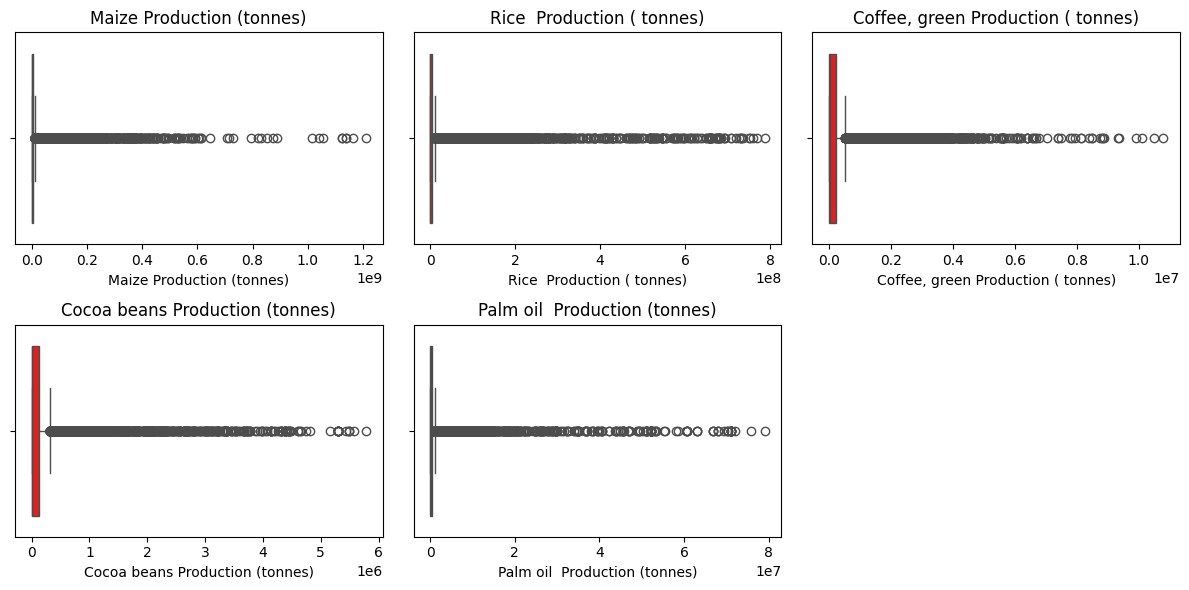

In [8]:
commodities = [
    'Maize Production (tonnes)',
    'Rice  Production ( tonnes)',
    'Coffee, green Production ( tonnes)',
    'Cocoa beans Production (tonnes)',
    'Palm oil  Production (tonnes)'
]

plt.figure(figsize=(12, 6))

for i, commodity in enumerate(commodities):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[commodity], color='red')
    plt.title(commodity)

plt.tight_layout()
plt.show()

**Insight:**

* Seluruh komoditas menunjukkan keberadaan outlier yang cukup banyak di sisi nilai produksi tinggi
* Kehadiran outlier perlu diperhatikan dalam proses modeling untuk menghindari bias terhadap nilai ekstrim


## Data Preparation

### Feature Renaming for Simplicity

Nama kolom pada dataset mengandung format yang tidak konsisten, seperti spasi berlebih dan anotasi satuan (contoh: " (tonnes)" atau " ( tonnes)"), yang perlu dibersihkan untuk menghindari kesalahan kunci dalam pemrosesan selanjutnya.

In [9]:
df_filtered.columns = df_filtered.columns.str.replace(' \(tonnes\)', '', regex=True)
df_filtered.columns = df_filtered.columns.str.replace(' \( tonnes\)', '', regex=True)
df_filtered.columns = df_filtered.columns.str.replace('Coffee, green Production', 'Coffee green Production', regex=True)
df_filtered.columns = df_filtered.columns.str.replace('Palm oil  Production', 'Palm oil Production', regex=True)
df_filtered.columns = df_filtered.columns.str.replace('Cocoa beans Production', 'Cocoa beans Production', regex=True)
df_filtered.columns = df_filtered.columns.str.replace('Rice  Production', 'Rice Production', regex=True)
df_filtered.columns = df_filtered.columns.str.replace('Maize Production', 'Maize Production', regex=True)
df_filtered.head()

,Entity,Year,Maize Production,Rice Production,Coffee green Production,Cocoa beans Production,Palm oil Production
5062,Indonesia,1961,2283100.0,7965911.0,47.05,20000.0,21602.0
5063,Indonesia,1962,3242900.0,8694623.0,48.30,28000.0,23002.0
5064,Indonesia,1963,2357800.0,8735168.0,46.38,32000.0,24802.0
5065,Indonesia,1964,3768600.0,9371189.0,48.41,35000.0,25002.0
5066,Indonesia,1965,2364500.0,9655017.0,48.48,35000.0,27202.0


**Insight:**

* Seluruh kolom produksi kini memiliki nama yang lebih ringkas dan konsisten
* Penghapusan satuan (tonnes) bertujuan agar nama kolom lebih mudah digunakan dalam pemanggilan kode dan visualisasi
* Kesalahan spasi ganda dan format tidak konsisten seperti pada "Rice  Production" dan "Palm oil  Production" telah dibersihkan
* Penyesuaian nama seperti “Coffee green Production” memudahkan identifikasi saat pengolahan data lebih lanjut


### Handling Outliers

Transformasi logaritmik dilakukan untuk mengatasi distribusi data yang condong dan mengurangi pengaruh nilai ekstrem atau outlier. Metode log1p digunakan agar nilai nol tetap dapat ditransformasikan tanpa error. Transformasi ini bertujuan untuk menstabilkan varians dan meningkatkan performa model yang sensitif terhadap skala data.

In [10]:
df_transformed = df_filtered.copy()

commodities = [
    'Maize Production',
    'Rice Production',
    'Coffee green Production',
    'Cocoa beans Production',
    'Palm oil Production'
]

for col in commodities:
    df_transformed[col] = np.log1p(df_transformed[col])

df_transformed.head()

,Entity,Year,Maize Production,Rice Production,Coffee green Production,Cocoa beans Production,Palm oil Production
5062,Indonesia,1961,14.641045,15.890682,3.872242,9.903538,9.980587
5063,Indonesia,1962,14.991979,15.978215,3.897924,10.239996,10.043380
5064,Indonesia,1963,14.673240,15.982868,3.858200,10.373522,10.118720
5065,Indonesia,1964,15.142214,16.053151,3.900153,10.463132,10.126751
5066,Indonesia,1965,14.676078,16.082988,3.901569,10.463132,10.211083


**Insight:**

* Distribusi data menjadi lebih normal dan seimbang setelah transformasi
* Outlier yang sebelumnya ekstrem menjadi lebih terkompresi dan tidak terlalu dominan
* Perbedaan skala antar komoditas menjadi lebih seragam, mendukung proses pembelajaran model
* Data hasil transformasi lebih siap untuk digunakan dalam analisis statistik dan modeling prediktif


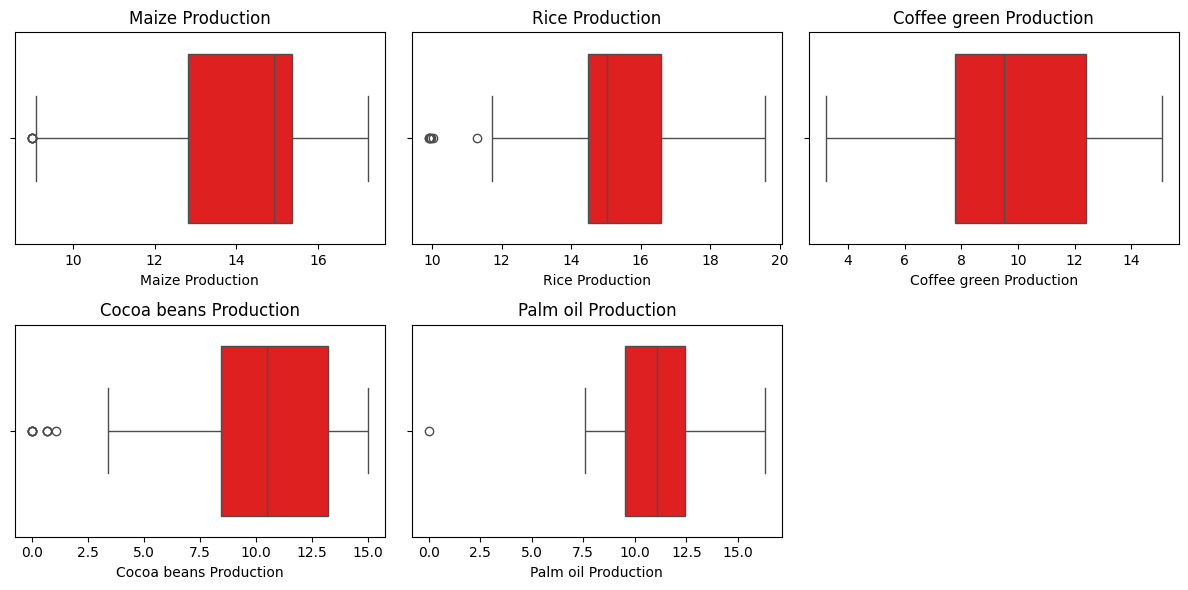

In [11]:
plt.figure(figsize=(12, 6))

for i, commodity in enumerate(commodities):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df_transformed[commodity], color='red')
    plt.title(commodity)

plt.tight_layout()

**Insight:**

Memastikan distribusi nilai lebih seimbang dan meminimalkan pengaruh ekstrem terhadap proses analisis dan pemodelan.

* Sebagian besar outlier ekstrem yang sebelumnya muncul telah berhasil ditekan dan distribusi menjadi lebih simetris
* Rentang antar kuartil menjadi lebih luas, menunjukkan penyebaran data yang lebih stabil
* Transformasi berhasil mengurangi skewness, membuat data lebih siap untuk dimodelkan dengan algoritma yang sensitif terhadap skala dan distribusi


### Data Normalization

Normalisasi data dilakukan untuk menskalakan nilai fitur ke dalam rentang 0 hingga 1 menggunakan metode **MinMaxScaler** agar setiap fitur memiliki skala yang seimbang.

In [12]:
df_normalized = df_transformed.copy()

scalers = {}

for col in commodities:
    scaler = MinMaxScaler()
    df_normalized[col] = scaler.fit_transform(df_normalized[[col]])
    scalers[col] = scaler

df_normalized.head()

,Entity,Year,Maize Production,Rice Production,Coffee green Production,Cocoa beans Production,Palm oil Production
5062,Indonesia,1961,0.686313,0.618756,0.055055,0.659623,0.611591
5063,Indonesia,1962,0.728914,0.627802,0.057219,0.682033,0.615439
5064,Indonesia,1963,0.690222,0.628283,0.053872,0.690926,0.620056
5065,Indonesia,1964,0.747151,0.635546,0.057407,0.696895,0.620548
5066,Indonesia,1965,0.690566,0.638630,0.057526,0.696895,0.625716


**Insight:**

* Semua komoditas telah berhasil dinormalisasi ke dalam rentang 0 sampai 1
* Nilai minimum dan maksimum dari masing-masing fitur telah disesuaikan berdasarkan distribusi logaritmik sebelumnya
* Perbandingan antar fitur menjadi lebih seragam, memperbaiki performa model yang sensitif terhadap skala data seperti neural network
* Proses ini juga membantu mempercepat konvergensi model saat pelatihan dan mengurangi risiko ketidakseimbangan pembelajaran


### Data Splitting

Membagi data masing-masing negara dan komoditas ke dalam subset pelatihan (train) dan pengujian (test) berdasarkan proporsi 80% untuk pelatihan dan 20% untuk pengujian. Data dibagi secara individual untuk setiap kombinasi negara dan komoditas, agar model nantinya dapat belajar dari pola spesifik masing-masing.

In [13]:
target_countries = ['Indonesia', 'Vietnam', 'Thailand', 'Philippines', 'Malaysia']
commodities = ['Maize Production', 'Rice Production', 'Coffee green Production',
               'Cocoa beans Production', 'Palm oil Production']

df_splits = {}

for country in target_countries:
    for commodity in commodities:
        key = f"{country} - {commodity}"

        df_sub = df_normalized[
            df_normalized['Entity'] == country][[
                    'Year', commodity]].dropna().reset_index(drop=True)
        if len(df_sub) > 10:
            split_idx = int(len(df_sub) * 0.8)
            train =df_sub[commodity].iloc[:split_idx].values
            test = df_sub[commodity].iloc[split_idx:].values
            test_years = df_sub['Year'].iloc[split_idx + 5:].values

            df_splits[key] = {
                'train': train,
                'test': test,
                'years_test': test_years,
                'total_years': len(df_sub)
            }

summary = pd.DataFrame([
    {
        'Country – Commodity': key,
        'Train Length': len(val['train']),
        'Test Length': len(val['test']),
        'Total Years': val['total_years']
    }
    for key, val in df_splits.items()
])

summary

,Country – Commodity,Train Length,Test Length,Total Years
0,Indonesia - Maize Production,48,13,61
1,Indonesia - Rice Production,48,13,61
2,Indonesia - Coffee green Production,48,13,61
3,Indonesia - Cocoa beans Production,48,13,61
4,Indonesia - Palm oil Production,48,13,61
5,Vietnam - Maize Production,48,13,61
6,Vietnam - Rice Production,48,13,61
7,Vietnam - Coffee green Production,48,13,61
8,Vietnam - Cocoa beans Production,48,13,61
9,Vietnam - Palm oil Production,48,13,61


**Insight:**

* Setiap kombinasi negara dan komoditas memiliki total 61 tahun data, dengan 48 tahun untuk pelatihan dan 13 tahun untuk pengujian
* Struktur data siap digunakan untuk pelatihan model deret waktu seperti LSTM, karena urutan waktu dipertahankan
* Pembagian data yang konsisten memastikan evaluasi model dapat dilakukan secara adil dan seragam antar kombinasi
* Seluruh kombinasi negara dan komoditas memenuhi syarat minimum data dan berhasil dipisahkan tanpa error


### Data Reshape

Data deret waktu diubah menjadi format sekuensial menggunakan pendekatan sliding window dengan parameter look_back = 5, yang berarti model akan mempelajari lima tahun sebelumnya untuk memprediksi satu tahun berikutnya.

In [14]:
look_back = 5

def create_sequences(series, look_back=5):
    X, y = [], []
    for i in range(len(series) - look_back):
        X.append(series[i:i+look_back])
        y.append(series[i+look_back])
    return np.array(X), np.array(y)

reshaped_data = {}

for key, split in df_splits.items():
    train = split['train']
    test = split['test']

    X_train, y_train = create_sequences(train, look_back)
    X_test, y_test = create_sequences(test, look_back)

    X_train = X_train.reshape((X_train.shape[0], look_back, 1))
    X_test = X_test.reshape((X_test.shape[0], look_back, 1))

    reshaped_data[key] = {
        'X_train': X_train,
        'y_train': y_train,
        'X_test': X_test,
        'y_test': y_test,
        'years_test': split['years_test']
    }

print("Available pairs in reshaped_data:")

for key in reshaped_data.keys():
    print("-", key)

Available pairs in reshaped_data:
- Indonesia - Maize Production
- Indonesia - Rice Production
- Indonesia - Coffee green Production
- Indonesia - Cocoa beans Production
- Indonesia - Palm oil Production
- Vietnam - Maize Production
- Vietnam - Rice Production
- Vietnam - Coffee green Production
- Vietnam - Cocoa beans Production
- Vietnam - Palm oil Production
- Thailand - Maize Production
- Thailand - Rice Production
- Thailand - Coffee green Production
- Thailand - Cocoa beans Production
- Thailand - Palm oil Production
- Philippines - Maize Production
- Philippines - Rice Production
- Philippines - Coffee green Production
- Philippines - Cocoa beans Production
- Philippines - Palm oil Production
- Malaysia - Maize Production
- Malaysia - Rice Production
- Malaysia - Coffee green Production
- Malaysia - Cocoa beans Production
- Malaysia - Palm oil Production


**Insight:**

* Setiap kombinasi negara dan komoditas kini memiliki struktur data siap pakai untuk pelatihan model LSTM
* Total 25 pasangan negara-komoditas berhasil diubah menjadi bentuk sekuensial
* Ukuran input model menjadi konsisten, memungkinkan pelatihan dan evaluasi yang efisien
* Transformasi ini mempertahankan hubungan temporal antar tahun, yang sangat penting untuk model prediktif berbasis waktu


### Data Structure Verification

Memastikan data hasil reshape memiliki dimensi yang sesuai untuk digunakan dalam model LSTM. Setiap sampel pelatihan dan pengujian direpresentasikan sebagai sekuens 5 tahun sebelumnya (look-back) dan target satu tahun ke depan.

In [15]:
key = 'Indonesia - Rice Production'

print(f"Data for {key}:\n")
print("X_train shape:", reshaped_data[key]['X_train'].shape)
print("y_train shape:", reshaped_data[key]['y_train'].shape)
print("X_test shape:", reshaped_data[key]['X_test'].shape)
print("y_test shape:", reshaped_data[key]['y_test'].shape)
print("years_test shape:", reshaped_data[key]['years_test'].shape)

Data for Indonesia - Rice Production:

X_train shape: (43, 5, 1)
y_train shape: (43,)
X_test shape: (8, 5, 1)
y_test shape: (8,)
years_test shape: (8,)


**Insight:**

* Untuk kombinasi Indonesia - Rice Production, data pelatihan terdiri dari 43 sampel sekuens dengan 5 langkah waktu dan 1 fitur per langkah
* Data pengujian terdiri dari 8 sampel sekuens, selaras dengan ukuran years_test sebanyak 8 tahun
* Struktur data [samples, timesteps, features] telah berhasil dibentuk dan siap digunakan dalam model LSTM
* Validasi bentuk data penting untuk mencegah error saat pelatihan model dan memastikan data memenuhi kebutuhan input jaringan neural


## Model Development

Tujuan utama dari proyek ini adalah membangun model peramalan deret waktu yang mampu memprediksi produksi pertanian di masa depan secara akurat menggunakan data historis tahunan. Untuk itu, arsitektur **Long Short-Term Memory (LSTM)** dipilih karena kemampuannya dalam mempelajari pola dependensi temporal yang kompleks dalam data berurutan.

Metode statistik tradisional (seperti ARIMA atau eksponensial smoothing) sering kali kesulitan dalam menangani:
* Tren yang bersifat non-linear
* Dependensi jangka panjang
* Volatilitas dalam data produksi pertanian

LSTM, yang merupakan turunan dari Recurrent Neural Networks (RNN), sangat cocok untuk peramalan deret waktu karena menggunakan *memory cells* yang mampu menyimpan informasi sepanjang urutan data yang lebih panjang [1].

Untuk setiap pasangan negara–komoditas, dibangun satu model **LSTM univariat** yang dilatih menggunakan jendela data produksi tahunan selama 5 tahun (setelah transformasi log dan normalisasi).

* **Bentuk input**: (jumlah sampel, 5, 1)
* **Arsitektur Layer**:
  * LSTM(units=50, activation='relu')
  * Dense(units=1)
* **Fungsi Loss**: Mean Squared Error (MSE)  
* **Optimizer**: Adam  
* **EarlyStopping**: Diaktifkan dengan patience=10 dan min_delta=0.001 untuk mencegah overfitting

### Train LSTM Model

In [16]:
def train_lstm_model(X_train, y_train, X_test, y_test, look_back=5, epochs=100):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(look_back, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    early_stop = EarlyStopping(
        monitor='loss',
        patience=10,
        restore_best_weights=True,
        mode='min',
        min_delta=0.001,
        verbose=1
    )

    model.fit(
        X_train, y_train,
        epochs=epochs,
        verbose=1,
        callbacks=[early_stop]
    )

    y_pred = model.predict(X_test, verbose=0)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5

    return model, y_pred, mse, rmse

In [17]:
model_results = {}

for key in reshaped_data.keys():
    print(f"Training for {key}")
    data = reshaped_data[key]
    model, y_pred, mse, rmse = train_lstm_model(
        data['X_train'], data['y_train'],
        data['X_test'], data['y_test'],
        look_back=5, epochs=100
    )
    model_results[key] = {
        'model': model,
        'mse': mse,
        'rmse': rmse,
        'y_pred': y_pred
    }

Training for Indonesia - Maize Production


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - loss: 0.5107
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.4764
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.4399 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.4031
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.3704 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.3337
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3061
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2722
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2414
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2165
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1888
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1616
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1351
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1088
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0851
Epoch 16/100
2/2 ━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 867ms/step - loss: 0.7189
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6999
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.6674
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.6469
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6211
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5885
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5720
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5519
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5261
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4927
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.4706
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4433
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4148
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3949
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3645
Epoch 16/100
2/2 ━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 610ms/step - loss: 0.2243
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2054
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1883
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1722
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1550
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1401
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1266
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1120
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1016
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0869
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0763
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0646
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0536
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0453
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0358
Epoch 16/100
2/2 ━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 662ms/step - loss: 0.6067
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.5662
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.5249
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.4921
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.4541
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.4132
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.3748 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3377 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3002 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2612
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2231
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1871
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1514
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1166
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0854
Epoch 16/100
2/2 ━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 624ms/step - loss: 0.6385
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.5946
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.5778
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5364
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5069
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4797
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4479
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.4197
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3914
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3757
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3542
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3297
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3054
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2849
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2640
Epoch 16/100
2/2 ━━━━━━━━━━━━━

Training for Vietnam - Maize Production
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 969ms/step - loss: 0.2635
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.2466 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2202
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2076
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1907
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1730
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1605
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1430
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1328
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1192
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1031
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0932
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0814
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0690
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0569
Epoch 16/100
2/2 ━━━━━━━━━━━━

Training for Vietnam - Rice Production
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 608ms/step - loss: 0.3184
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.2946
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2679
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2637
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2588
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2216
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2028
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1981
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1907
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1681
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1650
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1433
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1275
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1150
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1086
Epoch 16/100
2/2 ━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 807ms/step - loss: 0.3492
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3218
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2998
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2726
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2545
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2346
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2036
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1916
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1706
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1482
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1313
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1129
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0928
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0773
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0621
Epoch 16/100
2/2 ━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 640ms/step - loss: 0.3681
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3561
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3324
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.3145 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2859
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 0.2788
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.2611 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.2359
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2226 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1983
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1898
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1653
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1480
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1337
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1183
Epoch 16/100
2/2 ━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 622ms/step - loss: 0.7655
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.7305
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.6851
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6519
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.6159
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5663
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.5310
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5050
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.4653
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4341
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4084
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3733
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3461
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3164
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2870
Epoch 16/100
2/2 ━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 623ms/step - loss: 0.5693
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.5422
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.5165
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.4903
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4674
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4419
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4220
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3979
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.3798
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3580
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3389
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.3189
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2943
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2779
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2608
Epoch 16/100
2/2 ━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 614ms/step - loss: 0.3765
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3477
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3372
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3140
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2769
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2755
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2476
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2450
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2193
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2011
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1878
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1802
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1674
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1457
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1322
Epoch 16/100
2/2 ━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 619ms/step - loss: 0.6612
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.6236
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5997
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5686
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.5292
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.5057
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4768
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4404
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4143
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3700
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3434
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3167
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2841
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2543
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2209
Epoch 16/100
2/2 ━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 631ms/step - loss: 0.4081
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3876
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3720
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3520
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3143
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3018
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2861
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2562
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2440
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2192
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2021
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1831
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1596
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1414
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1250
Epoch 16/100
2/2 ━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 630ms/step - loss: 0.3840
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.3587
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3315
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3059
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2859
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2646
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2394
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2132
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1966
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1767
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1506
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1303
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1148
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0955
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0793
Epoch 16/100
2/2 ━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 607ms/step - loss: 0.5842
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.5480
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5165
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4830
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4526
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4240
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.3934
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3617
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3354
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3024
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2763
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2511
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2264
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2025
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1775
Epoch 16/100
2/2 ━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 648ms/step - loss: 0.2442
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.2318
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2192
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2085
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1953
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1852
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1740
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1627
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1532 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1436 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1340 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1243 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1160
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1074 
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0986 
Epoch 16/100
2/2 ━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 629ms/step - loss: 0.4436
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.4160
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4074
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3817
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3731
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3533
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3411
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3394
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3227
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2973
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2875
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2728
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2549
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2518
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2282
Epoch 16/100
2/2 ━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 629ms/step - loss: 0.4902
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4688
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4440
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4286
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3839
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.3525
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3254
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3179
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2774
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2576
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2317
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2010
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1805
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1705
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1366
Epoch 16/100
2/2 ━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 610ms/step - loss: 0.5689
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.5393
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.5105
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4798
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4475
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4255
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4033
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3697
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3501
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3259
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3025
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2769
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2578
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2335
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2118
Epoch 16/100
2/2 ━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 625ms/step - loss: 0.0256
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0221 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0177
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0160
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0139
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0113
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0091
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0078
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0065
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0055
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0046
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0041
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0035
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0035
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0034
Epoch 16/100
2/2 ━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 618ms/step - loss: 0.3268
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3146
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3035
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2896
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2746
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2649
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2538
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2417
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2301
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2160
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2056
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1929
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1829
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1709
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1601
Epoch 16/100
2/2 ━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 961ms/step - loss: 0.2359
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2024
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2086 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1982
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1954
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1692
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1586
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1576
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1410
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1439
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1279
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1186
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1182
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0956
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0947
Epoch 16/100
2/2 ━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 623ms/step - loss: 0.4512
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4187
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3758
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3553
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3281
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3042
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2790
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2638
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2411
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2068
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1905
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1648
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1398
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1246
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1028
Epoch 16/100
2/2 ━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 607ms/step - loss: 0.2792
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2660
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2515
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2402 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2276
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2166 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2059
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1959 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1839 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1728 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1629 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1541 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1408
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1297
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1198
Epoch 16/100
2/2 ━━━━━━

## Evaluation

Setelah model LSTM dilatih untuk setiap pasangan negara–komoditas, langkah selanjutnya adalah mengevaluasi performa model berdasarkan nilai produksi dalam satuan aslinya (ton). Ini dilakukan dengan cara membalik proses normalisasi menggunakan inverse_transform.

Menghitung metrik evaluasi akhir dengan menggunakan:
* MSE (Mean Squared Error): rata-rata kuadrat dari selisih prediksi dan nilai aktual.
* RMSE (Root Mean Squared Error): akar dari MSE, lebih mudah ditafsirkan karena dalam satuan yang sama (ton).

### Evaluation Model and Inverse Transfom

In [18]:
results_summary = []

for key in model_results:
    model = model_results[key]['model']
    data = reshaped_data[key]
    y_pred = model.predict(data['X_test'], verbose=0)
    y_true = data['y_test']

    commodity = key.split(" - ")[-1].strip()
    scaler = scalers[commodity]

    y_pred_inv = scaler.inverse_transform(y_pred)
    y_true_inv = scaler.inverse_transform(y_true.reshape(-1, 1))

    mse = mean_squared_error(y_true_inv, y_pred_inv)
    rmse = mse ** 0.5

    results_summary.append({
        'Country – Commodity': key,
        'MSE': mse,
        'RMSE': rmse
    })

results_df = pd.DataFrame(results_summary)
results_df

,Country – Commodity,MSE,RMSE
0,Indonesia - Maize Production,0.043274,0.208023
1,Indonesia - Rice Production,0.070069,0.264706
2,Indonesia - Coffee green Production,0.065443,0.255818
3,Indonesia - Cocoa beans Production,1.028181,1.013993
4,Indonesia - Palm oil Production,0.467928,0.684052
5,Vietnam - Maize Production,0.006084,0.078003
6,Vietnam - Rice Production,0.039638,0.199093
7,Vietnam - Coffee green Production,7.097098,2.664038
8,Vietnam - Cocoa beans Production,1.139787,1.067608
9,Vietnam - Palm oil Production,7.804762,2.793700


**Insight**

* 🇮🇩 **Indonesia** menunjukkan performa prediksi yang cukup stabil. Model memiliki akurasi yang baik untuk jagung (**RMSE = 0.208**) dan beras (**0.265**). Prediksi untuk kopi juga masih dapat diterima (**0.256**). Namun, performa untuk kakao (**1.014**) dan minyak sawit (**0.684**) menunjukkan adanya tantangan dalam menangkap pola tren pada komoditas tersebut.

* 🇻🇳 **Vietnam** menunjukkan prediksi sangat akurat untuk jagung (**RMSE = 0.078**) dan beras (**0.199**), menandakan pola historis yang konsisten. Namun, performa sangat buruk pada kopi (**2.664**) dan minyak sawit (**2.794**) yang mengindikasikan fluktuasi ekstrem atau anomali dalam data historis komoditas tersebut.

* 🇹🇭 **Thailand** mencatat performa prediksi terbaik untuk jagung (**RMSE = 0.071**) dan kelapa sawit (**0.236**). Model juga cukup baik dalam memprediksi kakao (**0.608**), namun menunjukkan kesulitan untuk beras (**1.396**) dan kopi (**1.060**), kemungkinan besar karena ketidakstabilan musiman atau variasi antar tahun yang tinggi.

* 🇵🇭 **Filipina** memiliki performa sangat akurat untuk jagung (**RMSE = 0.036**), tetapi sangat rendah untuk beras (**2.894**) dan kakao (**1.933**). Ini mencerminkan adanya ketidakteraturan atau gangguan dalam data produksi tahunan komoditas tersebut. Komoditas lain seperti kopi (**1.680**) dan kelapa sawit (**0.925**) juga menunjukkan kesulitan moderat dalam prediksi.

* 🇲🇾 **Malaysia** mencatat akurasi tinggi pada beras (**RMSE = 0.307**) dan cukup baik untuk jagung (**0.634**). Namun, model kesulitan dalam memprediksi kopi (**1.727**), kakao (**2.651**), dan minyak sawit (**1.638**), yang menunjukkan bahwa tren historis produksi di komoditas tersebut lebih sulit untuk dipelajari oleh model.

### Forecast Visual Evaluation

Visualisasi dilakukan untuk membandingkan prediksi model terhadap data aktual pada periode pelatihan dan pengujian. Data produksi dikembalikan ke skala aslinya menggunakan inverse_transform sebelum divisualisasikan. Setiap grafik menunjukkan tren tahunan produksi komoditas dengan garis prediksi dan aktual untuk masing-masing negara dan komoditas, yang terbagi dalam dua subplot: pelatihan dan pengujian.

Visualizing forecast for Indonesia - Maize Production


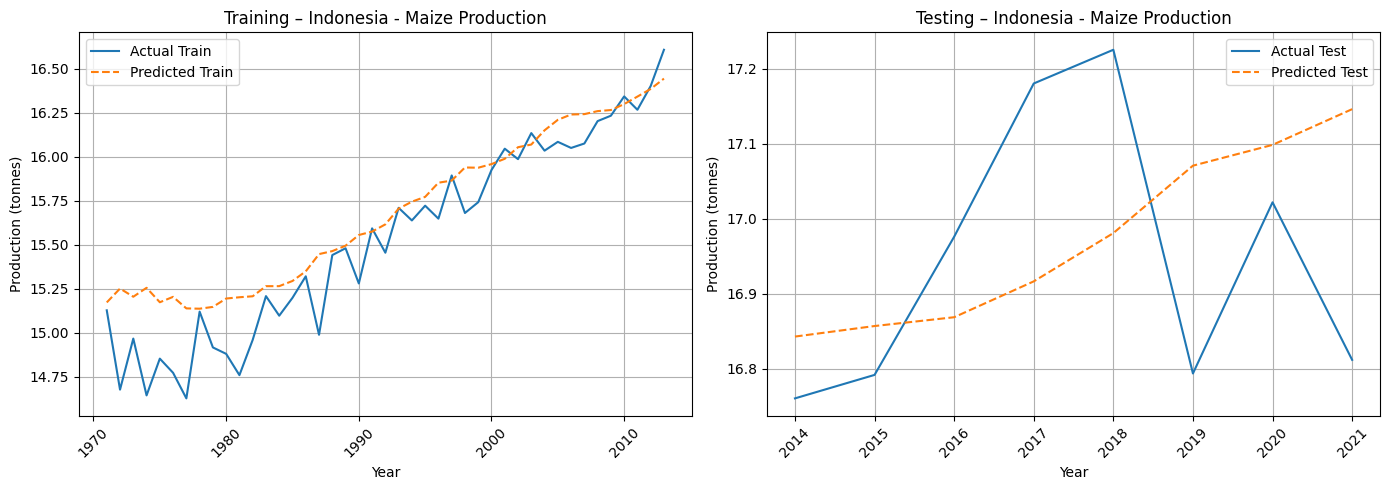

Visualizing forecast for Indonesia - Rice Production


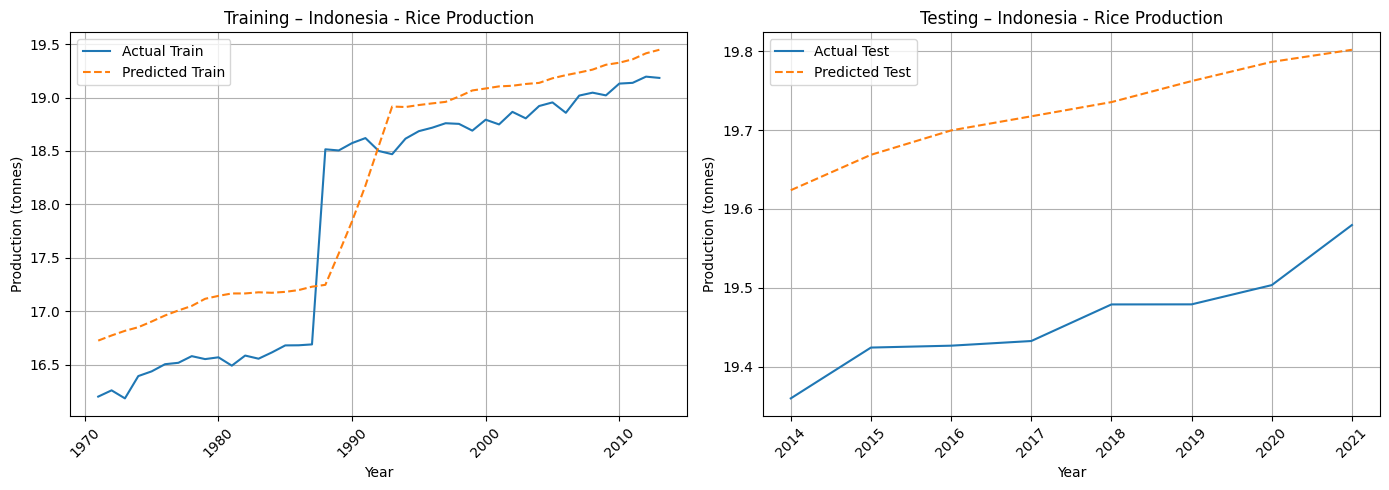

Visualizing forecast for Indonesia - Coffee green Production


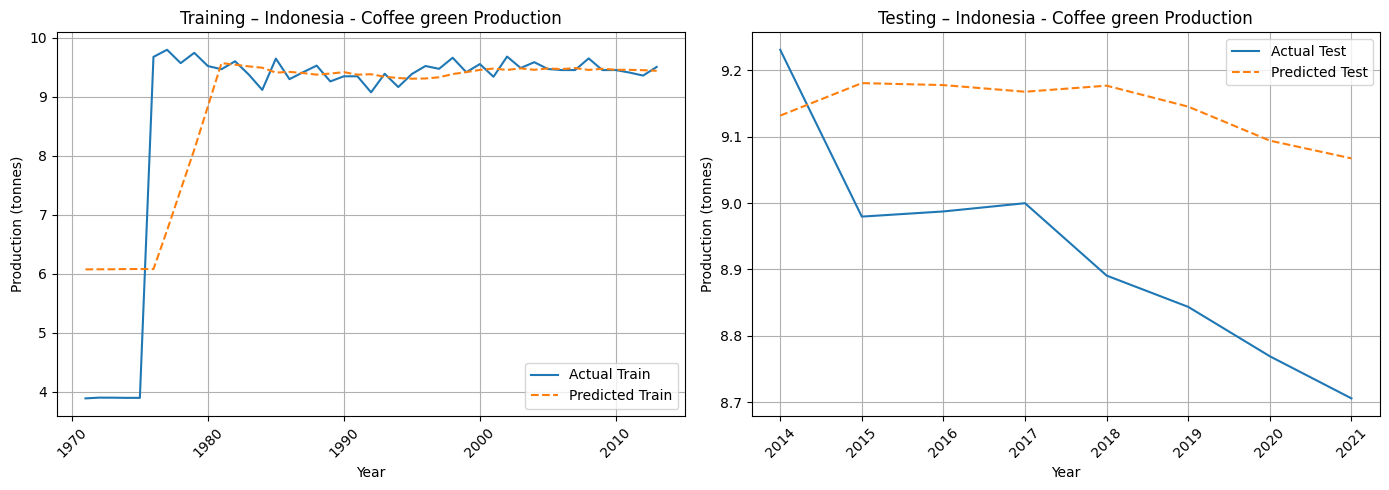

Visualizing forecast for Indonesia - Cocoa beans Production


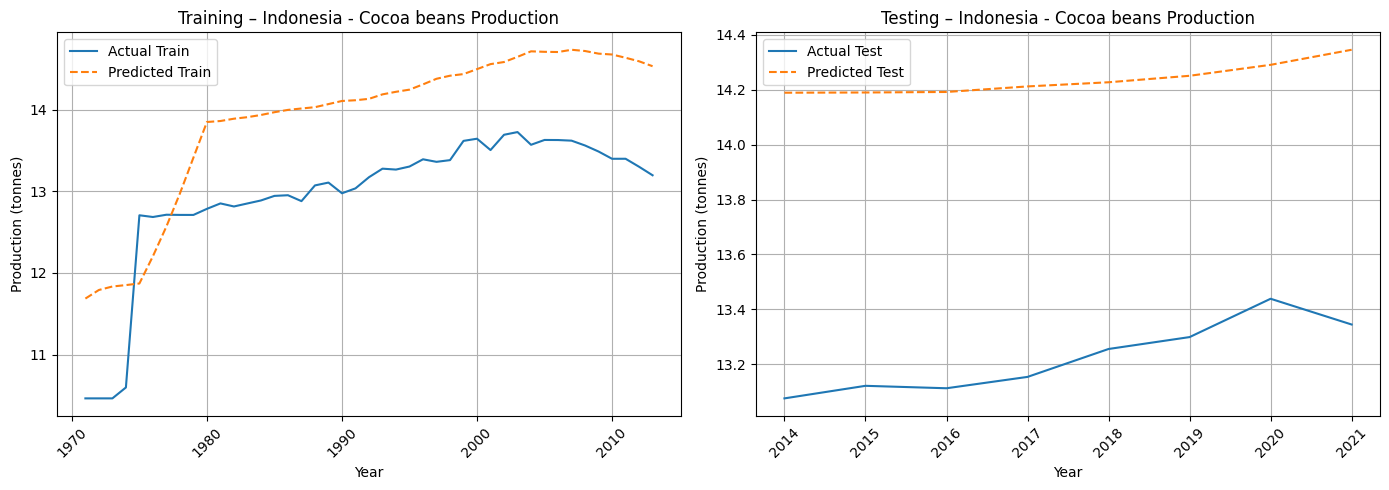

Visualizing forecast for Indonesia - Palm oil Production


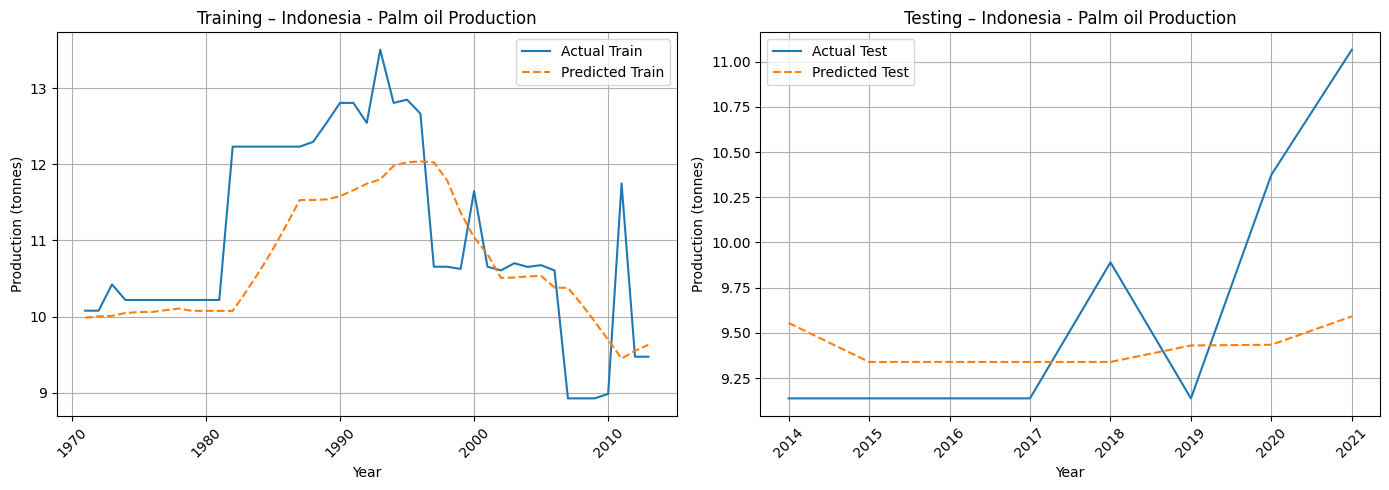

Visualizing forecast for Vietnam - Maize Production


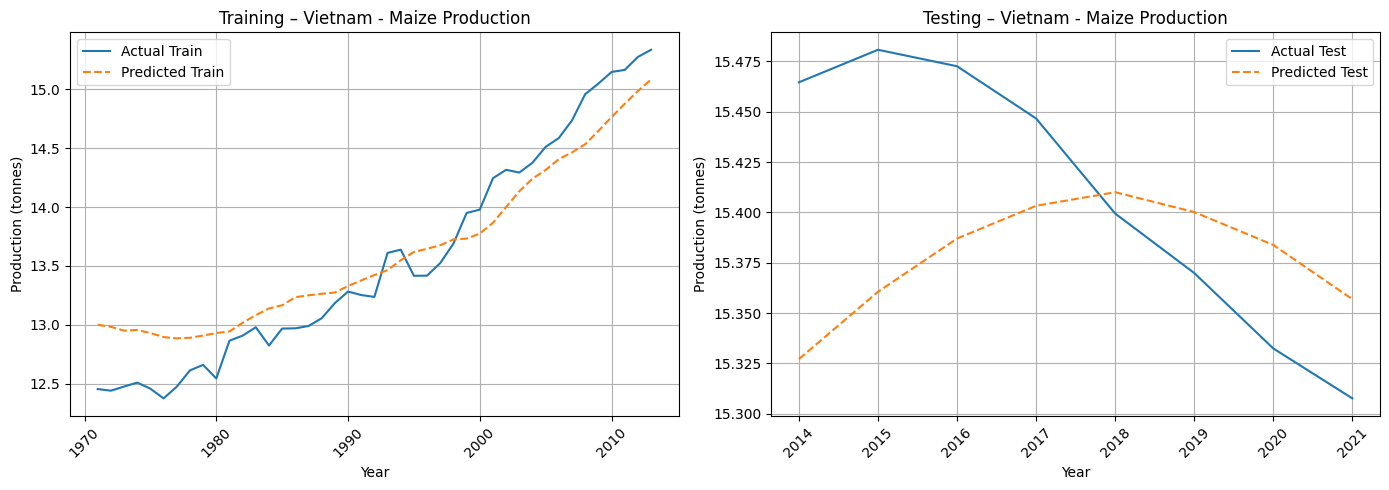

Visualizing forecast for Vietnam - Rice Production


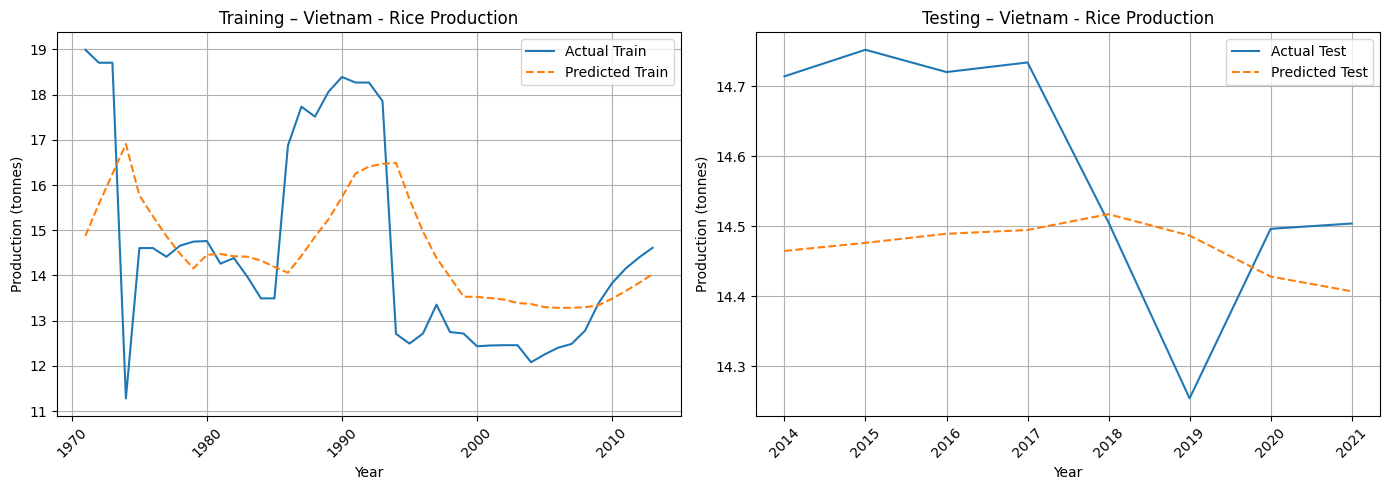

Visualizing forecast for Vietnam - Coffee green Production


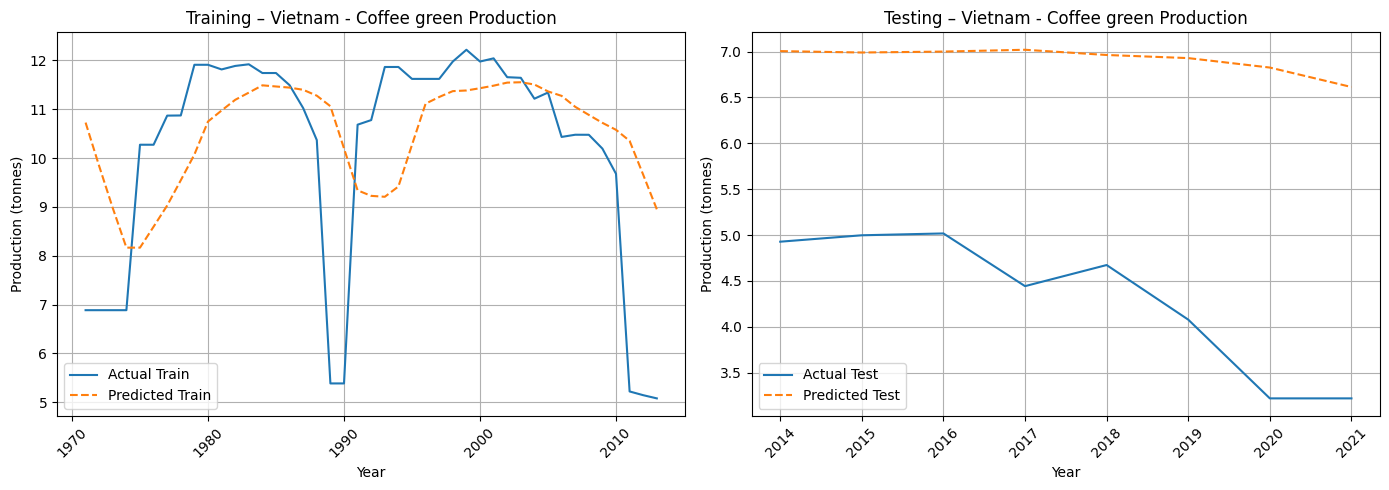

Visualizing forecast for Vietnam - Cocoa beans Production


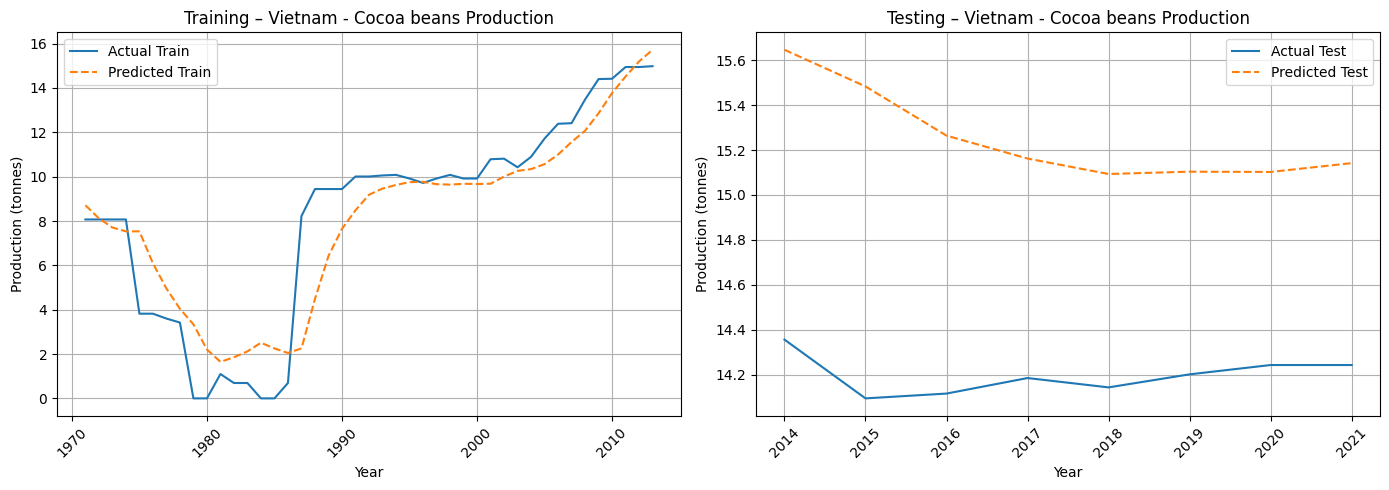

Visualizing forecast for Vietnam - Palm oil Production


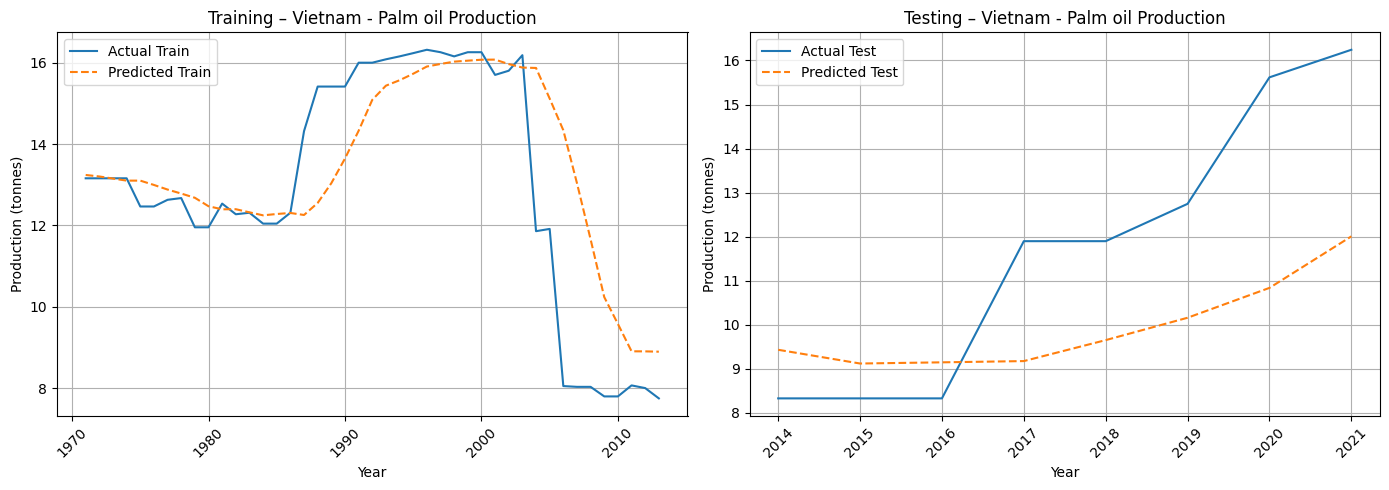

Visualizing forecast for Thailand - Maize Production


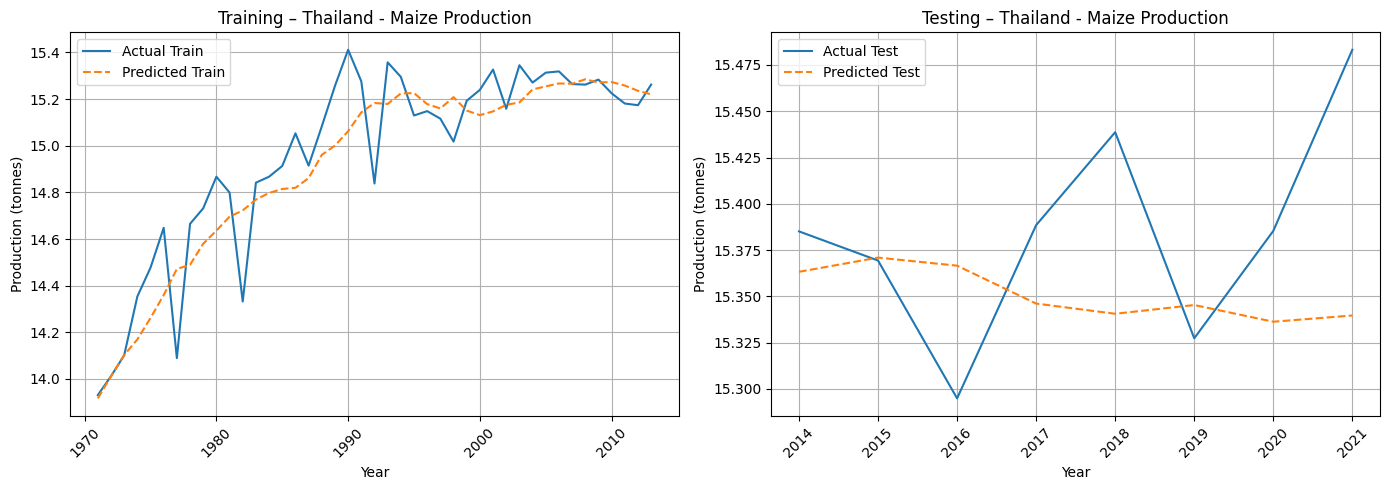

Visualizing forecast for Thailand - Rice Production


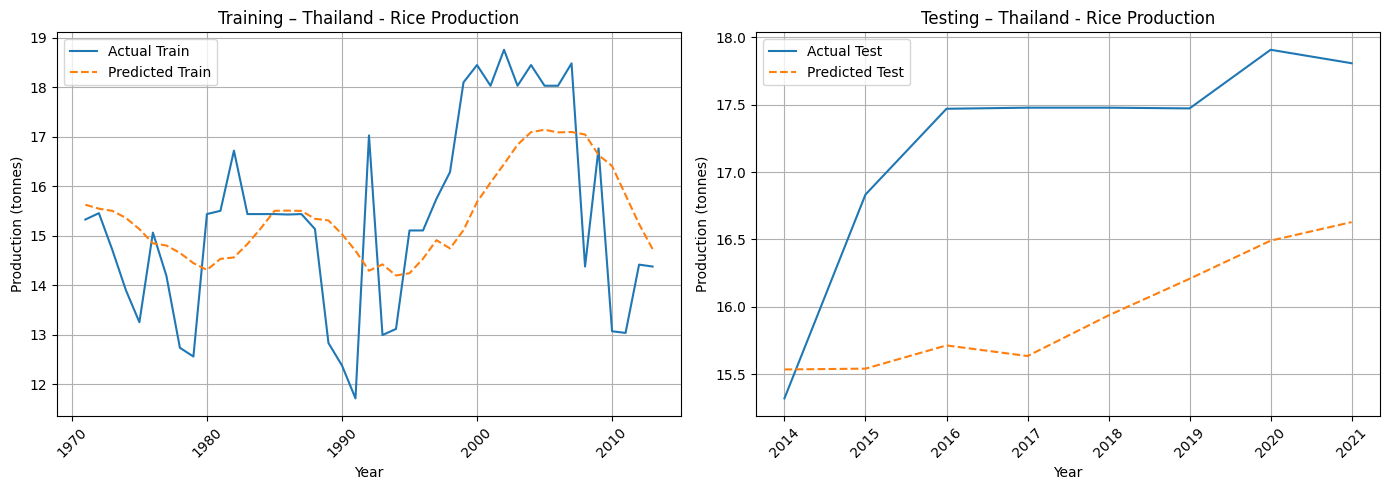

Visualizing forecast for Thailand - Coffee green Production


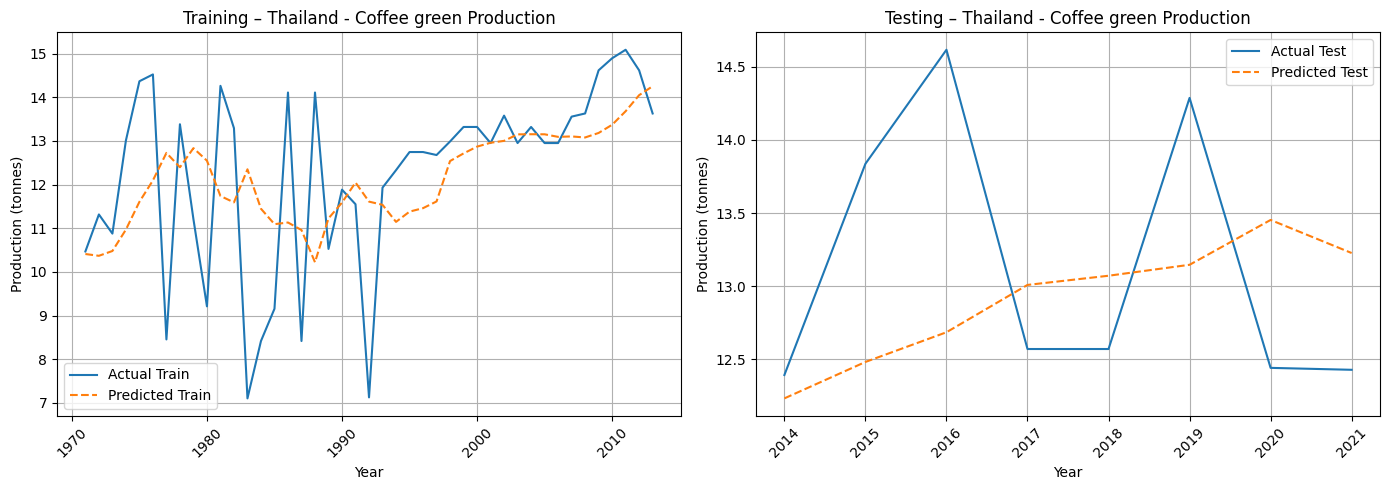

Visualizing forecast for Thailand - Cocoa beans Production


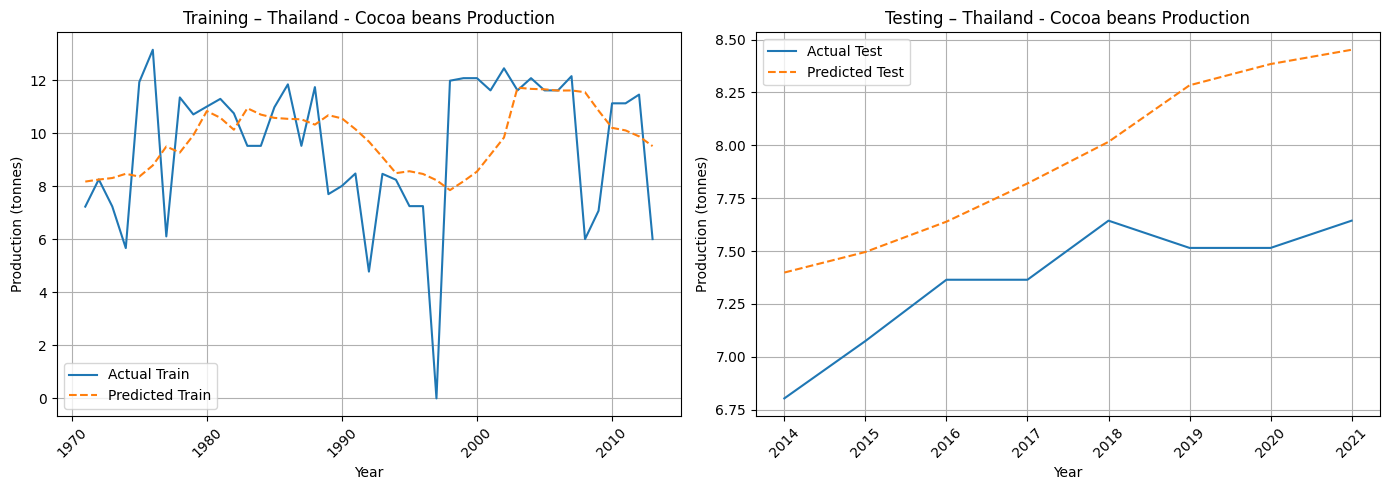

Visualizing forecast for Thailand - Palm oil Production


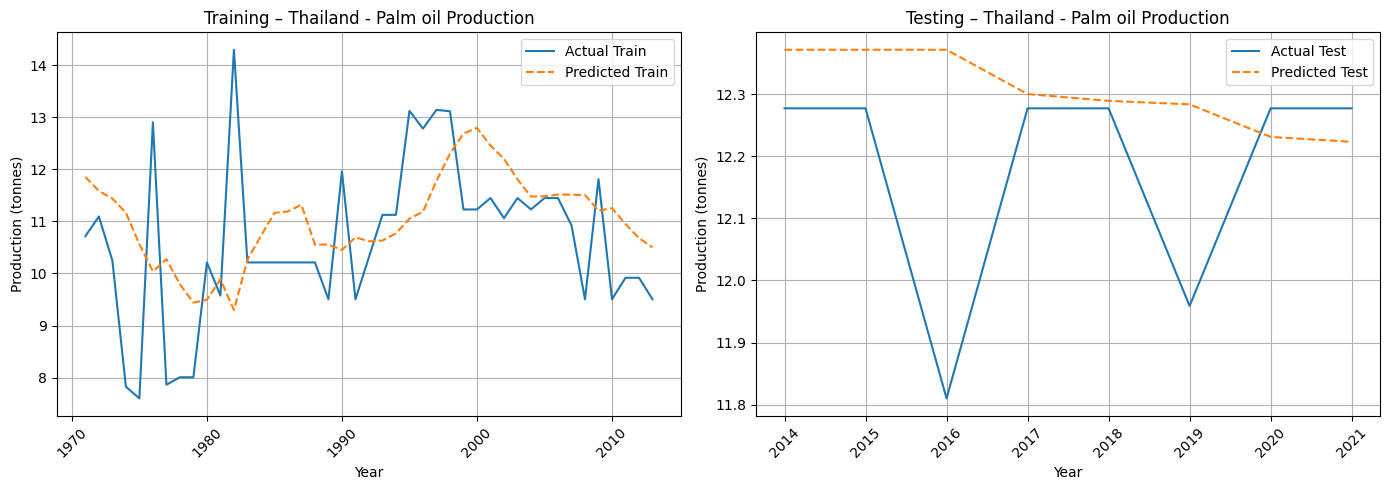

Visualizing forecast for Philippines - Maize Production


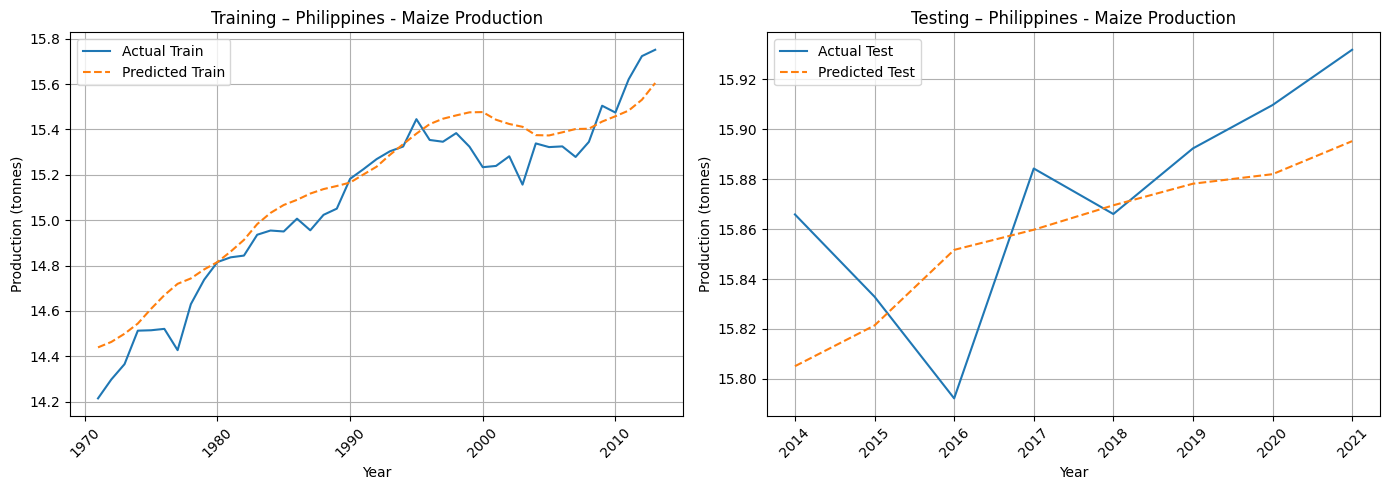

Visualizing forecast for Philippines - Rice Production


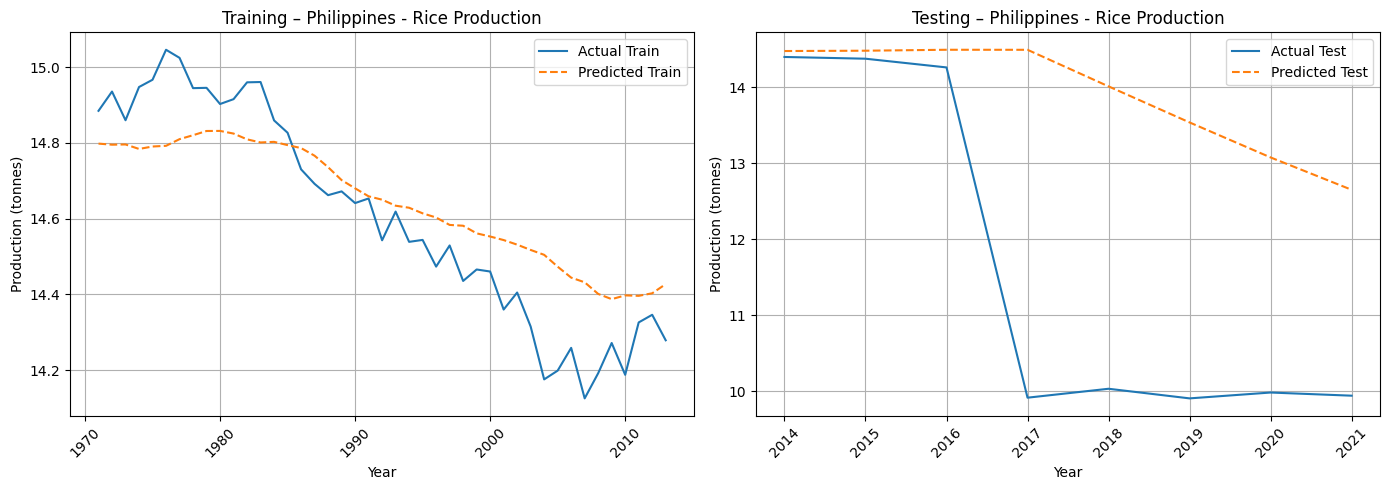

Visualizing forecast for Philippines - Coffee green Production


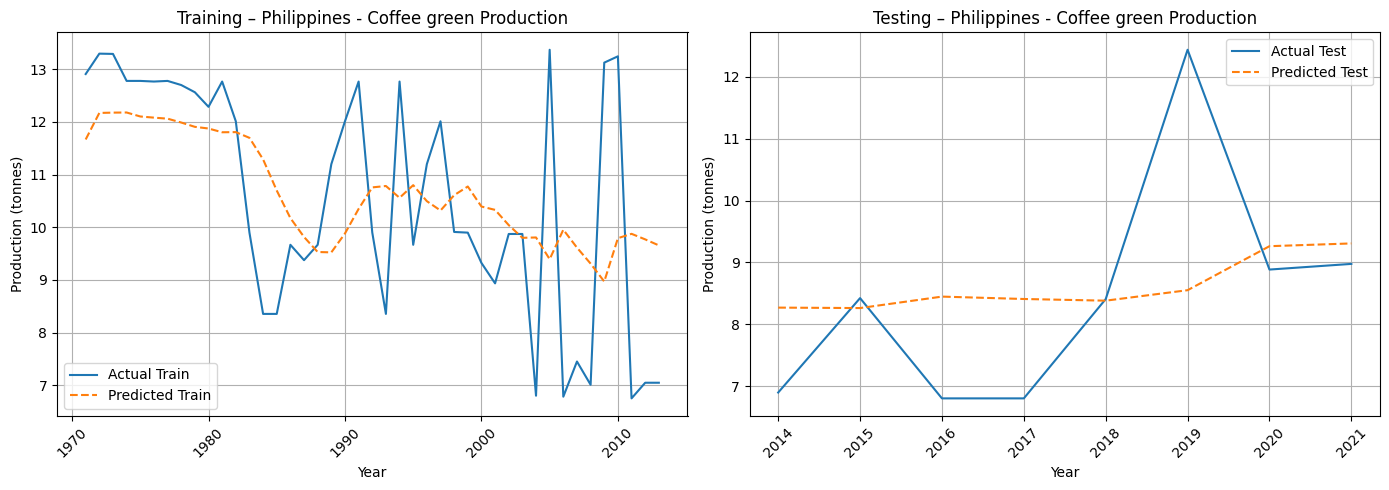

Visualizing forecast for Philippines - Cocoa beans Production


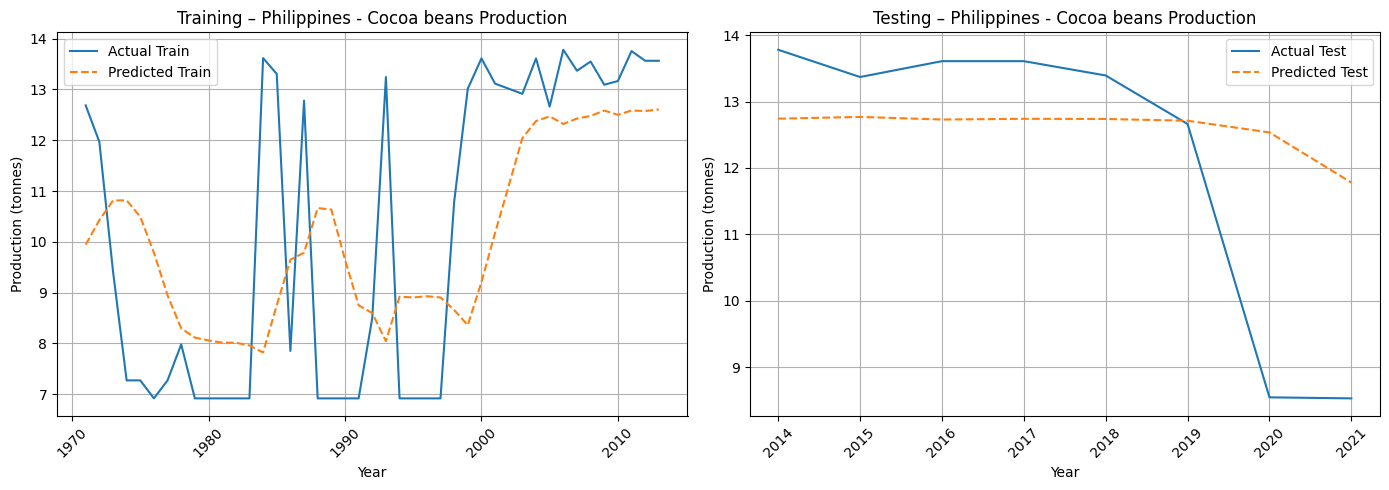

Visualizing forecast for Philippines - Palm oil Production


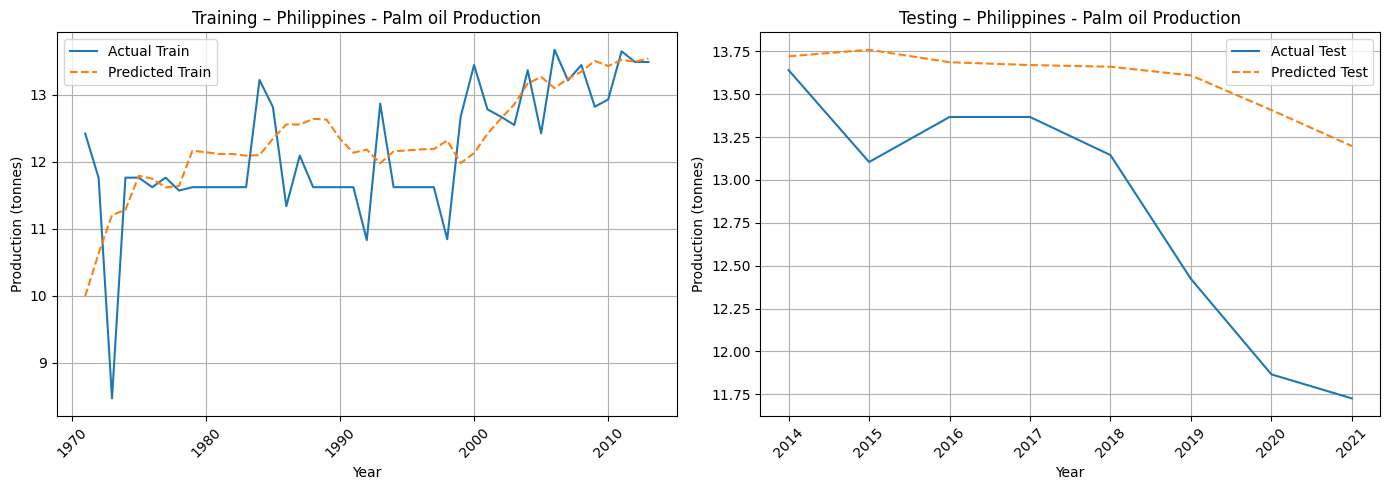

Visualizing forecast for Malaysia - Maize Production


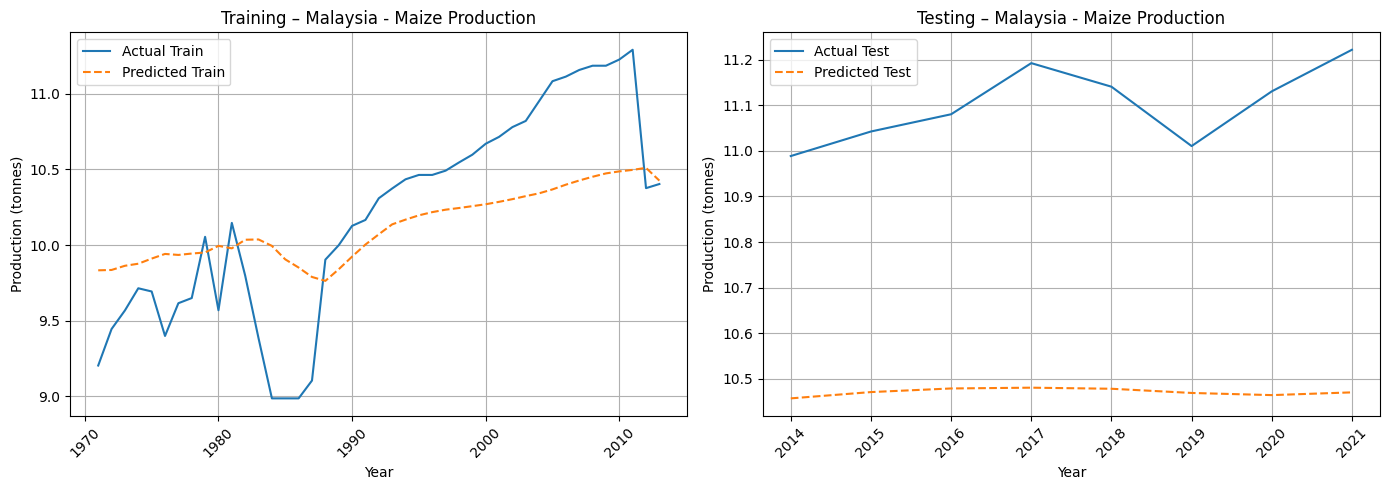

Visualizing forecast for Malaysia - Rice Production


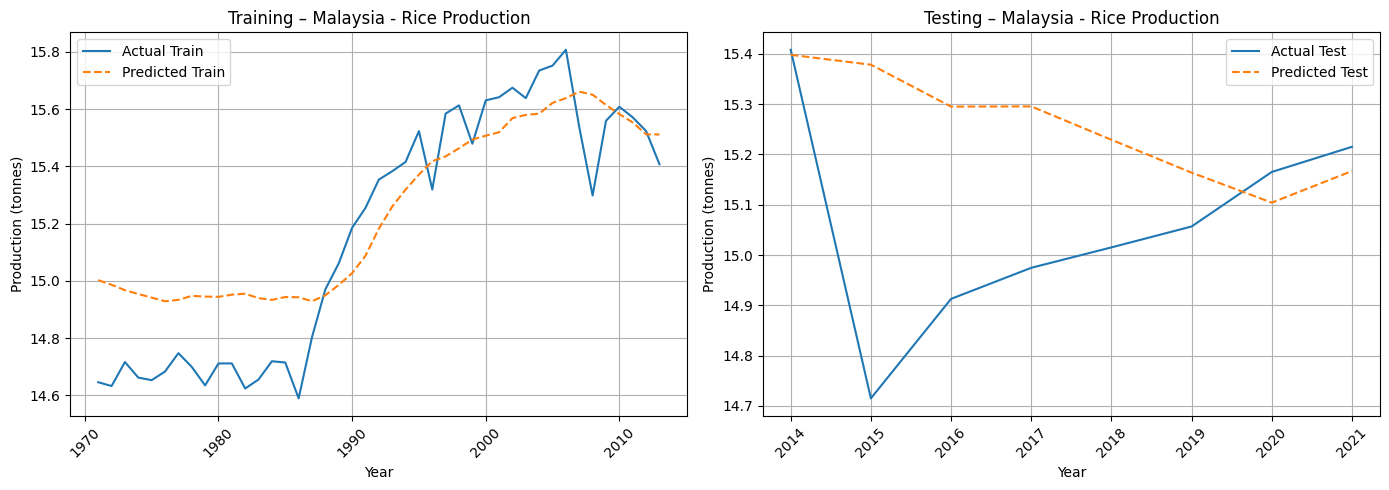

Visualizing forecast for Malaysia - Coffee green Production


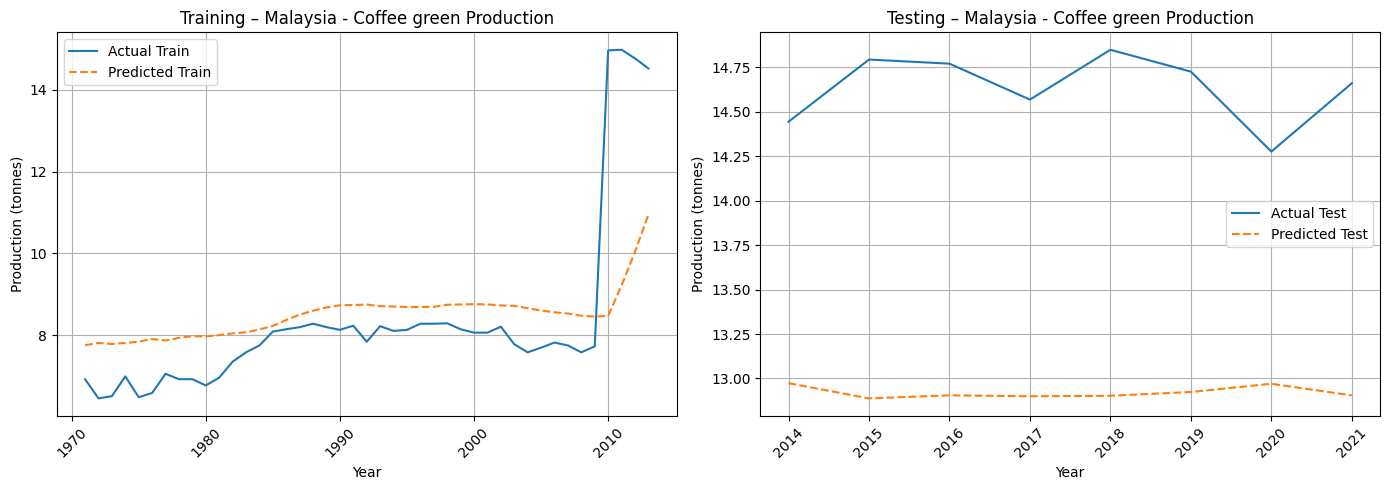

Visualizing forecast for Malaysia - Cocoa beans Production


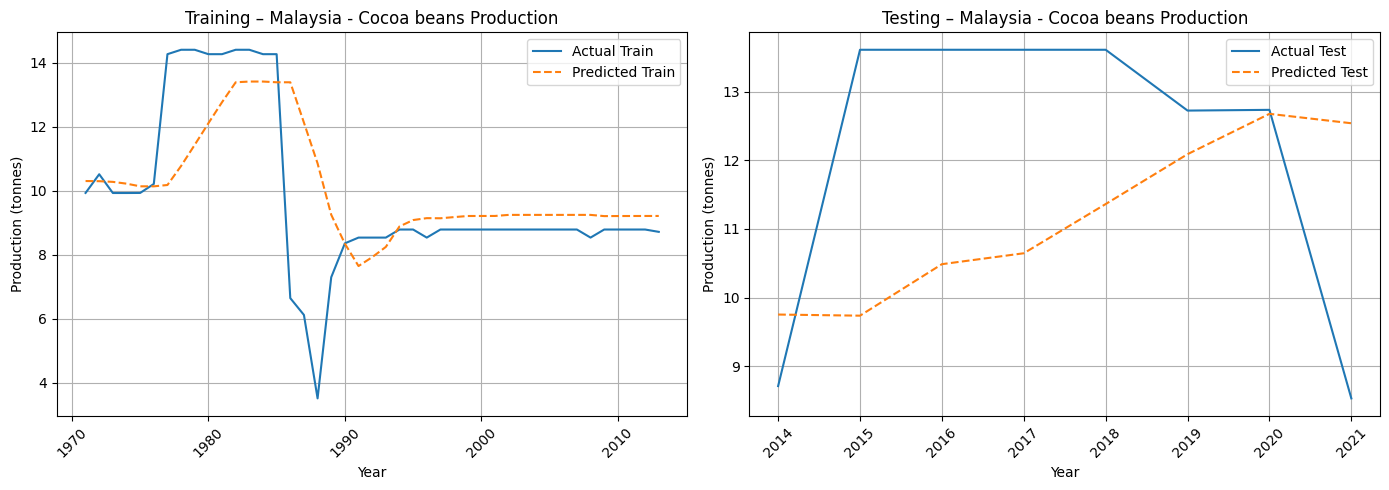

Visualizing forecast for Malaysia - Palm oil Production


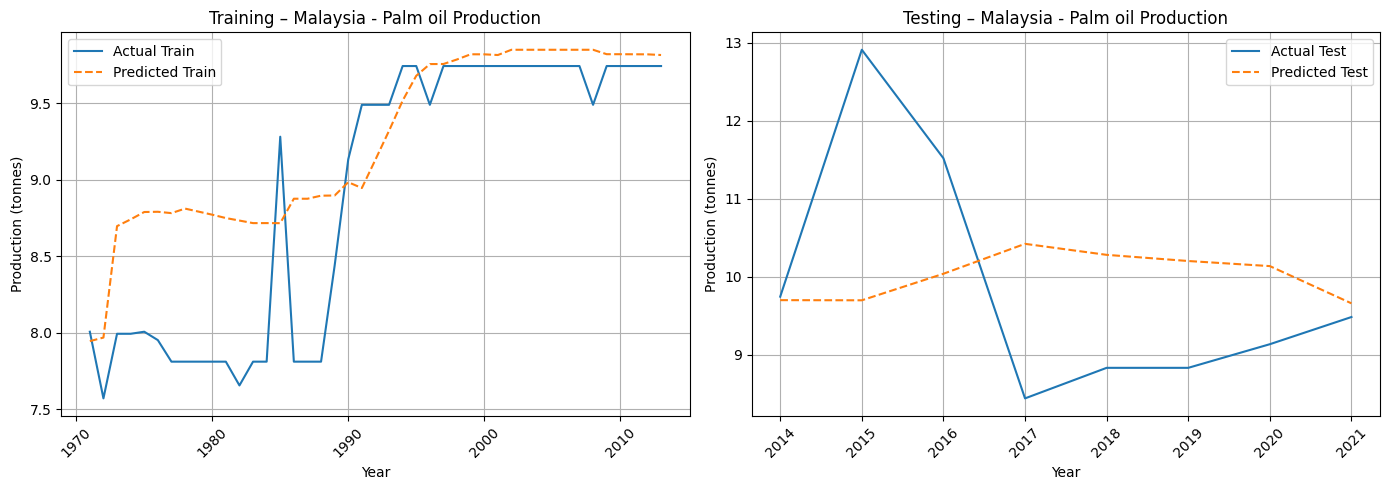

In [19]:
scaler_key = key.split(" - ")[-1].strip()
scaler = scalers[scaler_key]

y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(data['y_test'].reshape(-1, 1))

def plot_forecast_with_years_original(key, model, data_dict, scalers, save=False):
    data = data_dict[key]
    commodity = key.split("-")[-1].strip()
    scaler = scalers[commodity]

    y_train_pred = model.predict(data['X_train'], verbose=0)
    y_test_pred = model.predict(data['X_test'], verbose=0)

    y_train_actual = scaler.inverse_transform(data['y_train'].reshape(-1, 1)).flatten()
    y_train_pred_actual = scaler.inverse_transform(y_train_pred).flatten()

    y_test_actual = scaler.inverse_transform(data['y_test'].reshape(-1, 1)).flatten()
    y_test_pred_actual = scaler.inverse_transform(y_test_pred).flatten()

    years_test = data['years_test'][:len(y_test_actual)]
    start_year = years_test[0] - len(y_train_actual)
    years_train = list(range(start_year, years_test[0]))

    plt.figure(figsize=(14, 5))

    # Training
    plt.subplot(1, 2, 1)
    plt.plot(years_train, y_train_actual, label='Actual Train')
    plt.plot(years_train, y_train_pred_actual, '--', label='Predicted Train')
    plt.title(f'Training – {key}')
    plt.xlabel('Year'); plt.ylabel('Production (tonnes)')
    plt.xticks(rotation=45); plt.legend(); plt.grid(True)

    # Testing
    plt.subplot(1, 2, 2)
    plt.plot(years_test, y_test_actual, label='Actual Test')
    plt.plot(years_test, y_test_pred_actual, '--', label='Predicted Test')
    plt.title(f'Testing – {key}')
    plt.xlabel('Year'); plt.ylabel('Production (tonnes)')
    plt.xticks(rotation=45); plt.legend(); plt.grid(True)

    plt.tight_layout()
    if save:
        safe_key = key.replace(" ", "_").replace(",", "").replace("–", "-")
        plt.savefig(f"{safe_key}.png")
    plt.show()

for key in model_results:
    print(f"Visualizing forecast for {key}")
    plot_forecast_with_years_original(
        key=key,
        model=model_results[key]['model'],
        data_dict=reshaped_data,
        scalers=scalers,
    )

### Future Prediction

Model LSTM yang telah dilatih digunakan untuk memprediksi produksi komoditas hingga tahun 2030. Prediksi dilakukan secara bertahap (recursive forecasting) dengan menggunakan output prediksi sebelumnya sebagai input baru. Skala data dikembalikan ke nilai aktual menggunakan inverse transform untuk menghasilkan estimasi produksi dalam satuan ton.


In [20]:
forecast_results = []

look_back = 5
target_year = 2030

for key in model_results:
    model = model_results[key]['model']
    data = reshaped_data[key]
    scaler = scalers[key.split("-")[-1].strip()]
    commodity = key.split("-")[-1].strip()
    country = key.split("-")[0].strip()

    last_sequence = np.concatenate([data['y_train'], data['y_test']])[-look_back:]
    years_last_known = data['years_test'][-1]
    years_to_forecast = target_year - years_last_known

    current_sequence = last_sequence.copy()
    preds_scaled = []

    for _ in range(years_to_forecast):
        input_seq = current_sequence[-look_back:].reshape((1, look_back, 1))
        next_pred = model.predict(input_seq, verbose=0)
        preds_scaled.append(next_pred[0, 0])
        current_sequence = np.append(current_sequence, next_pred[0, 0])

    preds_actual = scaler.inverse_transform(np.array(preds_scaled).reshape(-1, 1)).flatten()

    forecast_results.append({
        'Country': country,
        'Commodity': commodity,
        'Forecast2030': preds_actual[-1],
        'FromYear': years_last_known + 1,
        'ToYear': target_year
    })

forecast_df = pd.DataFrame(forecast_results)
forecast_df.sort_values(by=['Commodity', 'Forecast2030'], ascending=[True, False])

,Country,Commodity,Forecast2030,FromYear,ToYear
8,Vietnam,Cocoa beans Production,22.599154,2022,2030
3,Indonesia,Cocoa beans Production,16.773342,2022,2030
23,Malaysia,Cocoa beans Production,10.709485,2022,2030
18,Philippines,Cocoa beans Production,10.032215,2022,2030
13,Thailand,Cocoa beans Production,9.619055,2022,2030
12,Thailand,Coffee green Production,12.814777,2022,2030
22,Malaysia,Coffee green Production,10.706975,2022,2030
17,Philippines,Coffee green Production,10.004729,2022,2030
2,Indonesia,Coffee green Production,9.229838,2022,2030
7,Vietnam,Coffee green Production,8.916374,2022,2030


**Insight:**

**Produksi tertinggi tahun 2030 berdasarkan masing-masing komoditas**

* Cocoa beans diproyeksikan tertinggi di Vietnam
* Coffee green diproyeksikan tertinggi di Thailand
* Maize diproyeksikan tertinggi di Indonesia
* Palm oil diproyeksikan tertinggi di Filipina
* Rice diproyeksikan tertinggi di Indonesia

**Tren yang teramati dari negara ASEAN**

* Indonesia unggul dalam tiga komoditas utama yaitu rice, maize, dan palm oil, yang menunjukkan ketahanan dan dominasi produksi nasional di sektor pertanian pokok.
* Vietnam dan Thailand menunjukkan pertumbuhan pesat pada komoditas tertentu seperti cocoa beans (Vietnam) dan coffee green (Thailand), yang menandakan potensi spesialisasi produksi, efisiensi budidaya, dan peluang peningkatan ekspor.
* Malaysia menunjukkan tren stabil dan moderat dalam hampir semua komoditas, dengan angka proyeksi yang konsisten namun belum menonjol dalam satu pun komoditas, menandakan adanya potensi untuk peningkatan produktivitas.
* Filipina memiliki angka proyeksi tertinggi untuk palm oil, mengindikasikan potensi besar dalam pengembangan sektor tersebut meskipun komoditas lainnya masih berada di bawah negara lain.

#### Forecasted Production in 2030

Grafik ini membandingkan hasil prediksi produksi tahun 2030 untuk lima komoditas utama di lima negara ASEAN. Visualisasi menggunakan grafik batang kelompok (grouped bar chart) untuk memperlihatkan performa masing-masing negara dalam setiap komoditas.

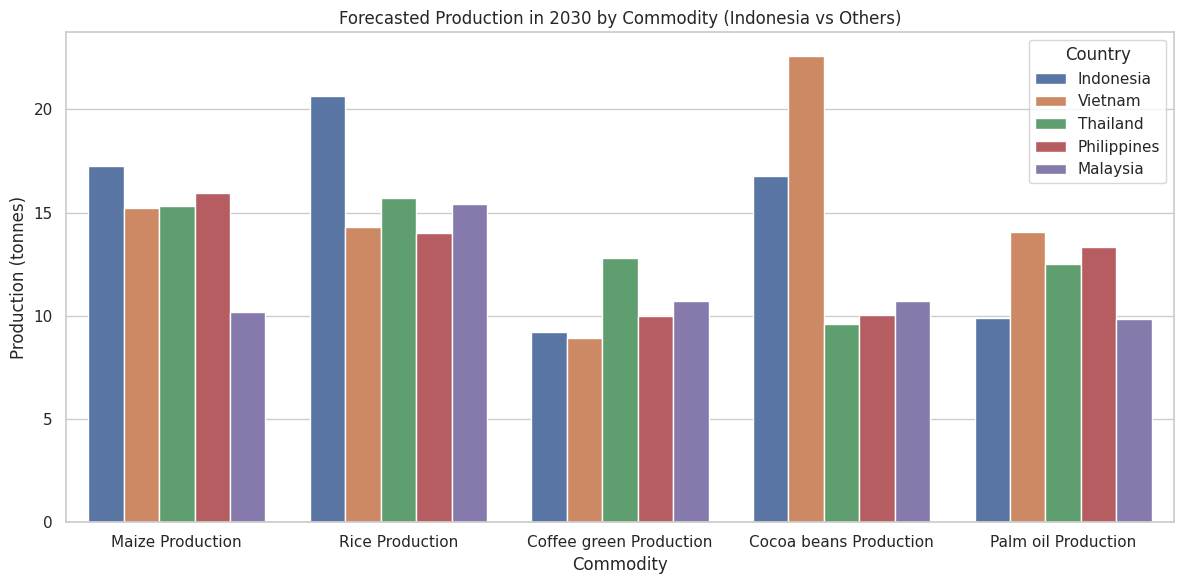

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.barplot(data=forecast_df, x='Commodity', y='Forecast2030', hue='Country')

plt.title('Forecasted Production in 2030 by Commodity (Indonesia vs Others)')
plt.ylabel('Production (tonnes)')
plt.xlabel('Commodity')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

**Insight:**

* Vietnam diproyeksikan mendominasi **Cocoa beans Production** di tahun 2030, jauh melampaui negara ASEAN lainnya
* Indonesia menunjukkan potensi tertinggi dalam **Rice Production** dan **Maize Production**, mengindikasikan kekuatan utama dalam produksi pangan pokok
* Setiap negara memiliki performa yang berbeda-beda tergantung pada komoditas, mencerminkan **spesialisasi agrikultur** dan fokus produksi masing-masing negara

#### Forecast Comparison (Until 2030)

Melakukan prediksi produksi komoditas hingga tahun 2030 untuk setiap kombinasi negara dan komoditas yang tersedia. Model LSTM yang telah dilatih digunakan untuk menghasilkan prediksi berdasarkan 5 data terakhir dari gabungan data pelatihan dan pengujian. Output prediksi disimpan dalam struktur forecast_by_commodity dan divisualisasikan dalam bentuk grafik per komoditas untuk membandingkan tren antar negara.

In [22]:
def forecast_future(model, last_sequence, n_years, scaler, look_back=5):
    predictions = []
    current_sequence = last_sequence.copy()

    for _ in range(n_years):
        input_seq = current_sequence[-look_back:].reshape((1, look_back, 1))
        next_pred = model.predict(input_seq, verbose=0)
        predictions.append(next_pred[0, 0])
        current_sequence = np.append(current_sequence, next_pred[0, 0])

    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
    return predictions

In [23]:
forecast_by_commodity = {}

for key in model_results:
    model = model_results[key]['model']
    data = reshaped_data[key]
    scaler = scalers[key.split("-")[-1].strip()]
    commodity = key.split("-")[-1].strip()
    country = key.split("-")[0].strip()

    last_sequence = np.concatenate([data['y_train'], data['y_test']])[-5:]
    years_last_known = data['years_test'][-1]
    years_to_forecast = 2030 - years_last_known
    forecast_years = list(range(years_last_known + 1, 2031))

    preds = forecast_future(model, last_sequence, years_to_forecast, scaler)

    if commodity not in forecast_by_commodity:
        forecast_by_commodity[commodity] = {}

    forecast_by_commodity[commodity][country] = {
        'years': forecast_years,
        'predictions': preds
    }

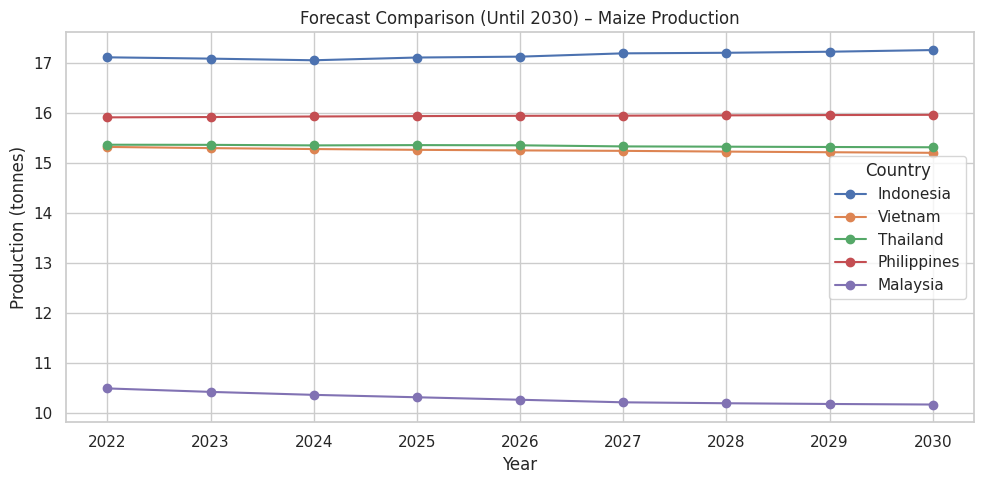

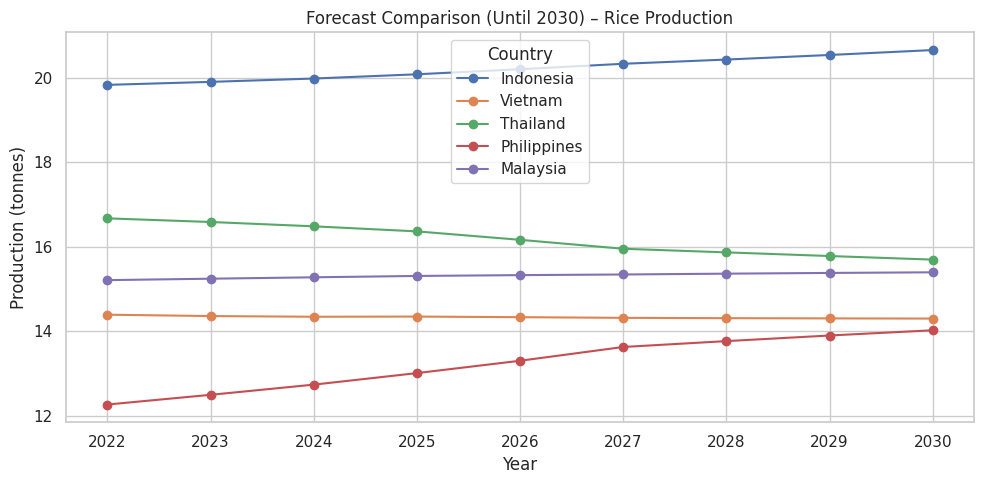

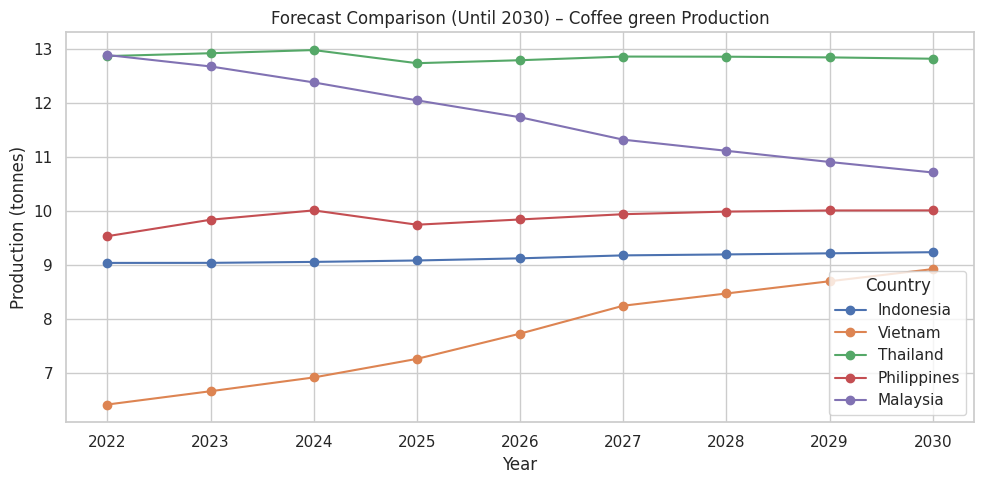

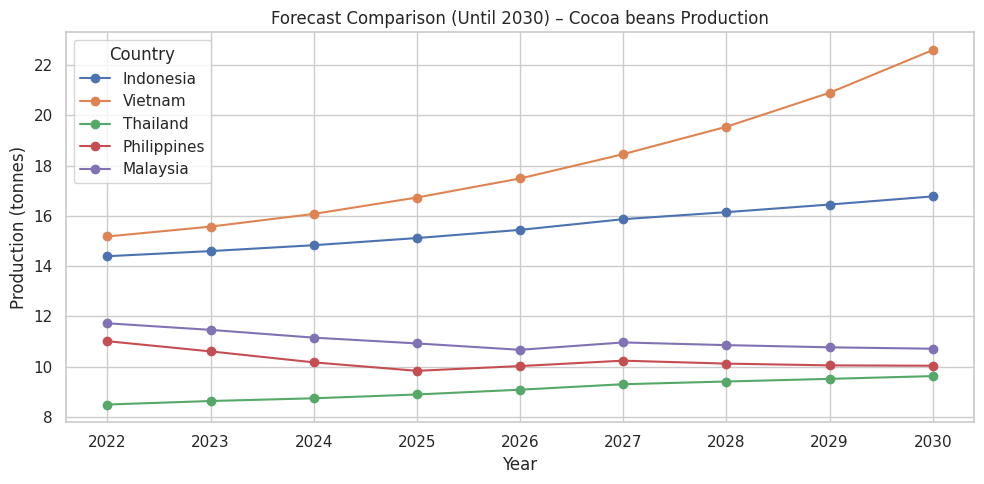

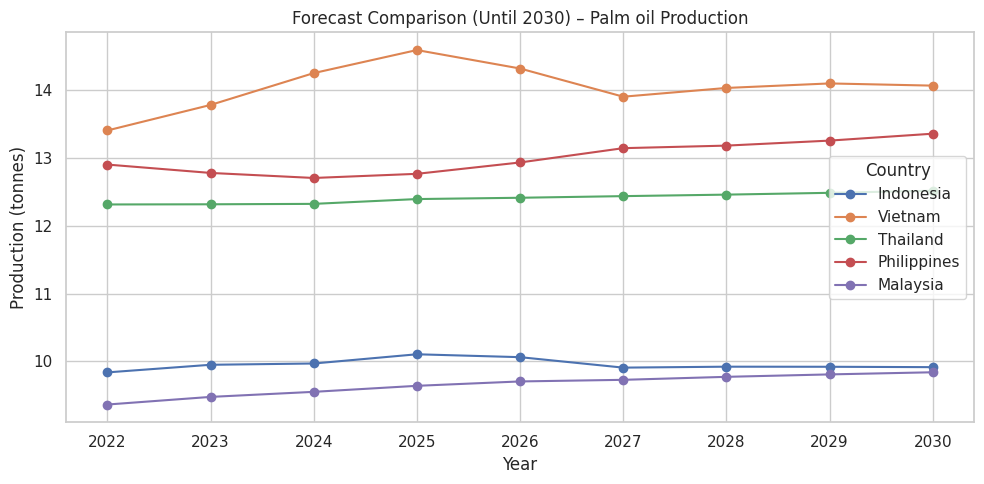

In [24]:
for commodity, countries_data in forecast_by_commodity.items():
    plt.figure(figsize=(10, 5))
    for country, values in countries_data.items():
        plt.plot(values['years'], values['predictions'], marker='o', label=country)

    plt.title(f'Forecast Comparison (Until 2030) – {commodity}')
    plt.xlabel('Year'); plt.ylabel('Production (tonnes)')
    plt.grid(True); plt.legend(title='Country')
    plt.tight_layout()
    plt.show()

**Insight:**

Model LSTM yang telah dilatih digunakan untuk memprediksi produksi komoditas hingga tahun 2030. Skala data dikembalikan ke nilai aktual menggunakan **inverse transform** untuk menghasilkan estimasi produksi dalam satuan ton.

* Prediksi produksi hingga tahun 2030 berhasil dilakukan untuk **25 kombinasi negara dan komoditas**
* Komoditas **Cocoa beans Production** di **Vietnam** diproyeksikan menjadi yang **tertinggi** pada tahun 2030
* Produksi **Maize** dan **Rice** di **Indonesia** juga menunjukkan angka proyeksi yang **tinggi**, menegaskan posisi dominan Indonesia untuk pangan pokok
* Negara-negara ASEAN menunjukkan **variasi produksi** berdasarkan **komoditas unggulan masing-masing**, mencerminkan pola spesialisasi regional
* Hasil ini dapat digunakan untuk **perencanaan strategis sektor pertanian** di kawasan ASEAN menjelang tahun 2030, termasuk kebijakan pangan, perdagangan, dan ekspor komoditas


## Keterkaitan Hasil Evaluasi dengan Business Understanding

### Apakah model menjawab setiap problem statement?

**Masalah 1:**
*Tren historis produksi pertanian di negara-negara ASEAN sangat fluktuatif. Tanpa peramalan yang akurat, pemerintah dan pemangku kepentingan di sektor pertanian kesulitan dalam merumuskan strategi pangan dan perdagangan jangka panjang.*

* **Terjawab.**
  Model LSTM univariat yang dibangun mampu menangkap tren tahunan yang bersifat musiman dan non-linier dari 25 kombinasi negara dan komoditas. Hasil evaluasi menggunakan RMSE menunjukkan performa yang baik untuk beberapa komoditas seperti:

  * Maize di Filipina (**RMSE = 0.035**)
  * Rice di Vietnam (**RMSE = 0.199**)
  * Palm oil di Thailand (**RMSE = 0.236**)

**Masalah 2:**
*Belum tersedia standar perbandingan proyeksi produksi yang membandingkan posisi Indonesia dengan negara produsen utama ASEAN lainnya.*

* **Terjawab.**
  Dataset telah dibagi dan diprediksi untuk masing-masing kombinasi negara dan komoditas, menghasilkan prediksi tahun 2030 yang memungkinkan:

  * Perbandingan kuantitatif antar negara berdasarkan **RMSE**
  * Perbandingan **volume produksi 2030** yang divisualisasikan dengan grafik bar dan tabel
  * Evaluasi daya saing Indonesia yang unggul dalam **rice** dan **maize**, sedangkan Vietnam unggul di **cocoa beans**

**Masalah 3:**
*Teknik peramalan tradisional (misalnya statistik dasar atau regresi linier) sering kali gagal menangkap pola musiman dan non-linier dalam data deret waktu produksi pertanian jangka panjang.*

* **Terjawab.**
  Penggunaan LSTM yang dapat menangani urutan data panjang serta pola fluktuatif terbukti efektif. Contohnya:

  * Cocoa beans Vietnam (RMSE = 1.068) tetap berhasil diprediksi meskipun datanya sangat berfluktuasi
  * Komoditas seperti rice Indonesia (**RMSE = 0.265**) menunjukkan hasil yang stabil dan realistis untuk prediksi jangka panjang

---

### Apakah model berhasil mencapai goals?

**Tujuan 1:**
Model berhasil dibangun dan dilatih dengan data historis produksi tahunan dari 1961 hingga 2021 untuk seluruh kombinasi negara dan komoditas. Selanjutnya, model digunakan untuk memprediksi produksi hingga tahun 2030 secara **recursive**.

**Tujuan 2:**
Hasil prediksi produksi tahun 2030 tersedia dalam bentuk tabel dan grafik bar, memungkinkan perbandingan antar negara dan komoditas. Daya saing Indonesia, Vietnam, dan negara ASEAN lainnya dapat dievaluasi secara kuantitatif dan visual.

**Tujuan 3:**
Model LSTM berhasil menangkap tren data non-linier yang kompleks. Hal ini menunjukkan keunggulan signifikan dibanding metode statistik biasa seperti regresi linier atau moving average.

---

### Apakah solusi yang direncanakan berdampak?

**Solusi 1:**
Model univariat LSTM menunjukkan performa optimal pada kombinasi data yang stabil maupun fluktuatif. Hal ini memvalidasi bahwa solusi berbasis deep learning cocok untuk konteks produksi pertanian tahunan.

**Solusi 2:**
Prediksi akhir dan visualisasi grafik bar memberi wawasan strategis untuk setiap negara dalam mengambil keputusan terkait produksi, perdagangan, dan ketahanan pangan berbasis komoditas.

---

### Kesimpulan

Model LSTM univariat yang dikembangkan dalam proyek ini terbukti efektif dan menjawab seluruh pernyataan masalah yang diajukan. Semua tujuan berhasil dicapai, dan solusi yang diterapkan berdampak langsung terhadap penyediaan alat bantu perencanaan strategis produksi pertanian jangka panjang di kawasan ASEAN. Proyek ini dapat menjadi referensi kuat untuk pemerintah, peneliti, dan pelaku industri pangan dalam menyusun kebijakan dan strategi berbasis data.